In [1]:
#Import the drive module from Google Colab to mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
#Importing the pandas library for data manipulation
import pandas as pd

#Reading the CSV file from your Google Drive into a pandas DataFrame
dataset = pd.read_excel("/content/drive/MyDrive/DataForTable2.1.xls")
dataset

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008     3.723590            7.350416        0.450662   
1     Afghanistan  2009     4.401778            7.508646        0.552308   
2     Afghanistan  2010     4.758381            7.613900        0.539075   
3     Afghanistan  2011     3.831719            7.581259        0.521104   
4     Afghanistan  2012     3.782938            7.660506        0.520637   
...           ...   ...          ...                 ...             ...   
2358     Zimbabwe  2019     2.693523            7.697755        0.759162   
2359     Zimbabwe  2020     3.159802            7.596050        0.717243   
2360     Zimbabwe  2021     3.154578            7.656878        0.685151   
2361     Zimbabwe  2022     3.296220            7.670073        0.666172   
2362     Zimbabwe  2023     3.572386            7.678590        0.693817   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                            50.500000                      0.718114   
1                            50.799999                      0.678896   
2                            51.099998                      0.600127   
3                            51.400002                      0.495901   
4                            51.700001                      0.530935   
...                                ...                           ...   
2358                         53.099998                      0.631908   
2359                         53.575001                      0.643303   
2360                         54.049999                      0.667636   
2361                         54.525002                      0.651987   
2362                         55.000000                      0.734613   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
0       0.164055                   0.881686         0.414297         0.258195  
1       0.187297                   0.850035         0.481421         0.237092  
2       0.117861                   0.706766         0.516907         0.275324  
3       0.160098                   0.731109         0.479835         0.267175  
4       0.234157                   0.775620         0.613513         0.267919  
...          ...                        ...              ...              ...  
2358   -0.050874                   0.830652         0.658434         0.235354  
2359    0.002848                   0.788523         0.660658         0.345736  
2360   -0.079007                   0.756945         0.609917         0.241682  
2361   -0.072935                   0.752632         0.640609         0.191350  
2362   -0.068837                   0.757494         0.609752         0.178953  

[2363 rows x 11 columns]

# **Dataset Overview**

In [39]:
#Getting the data types of all columns in the dataset
dataset.dtypes

Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object

In [40]:
#Getting the sum of null/missing values for each column in the dataset
dataset.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

# **Data Cleaning**

In [41]:
#Checking for duplicate rows in the dataset
duplicates = dataset.duplicated()

#Sum the number of duplicate rows
duplicate_count = duplicates.sum()

#Printing the total number of duplicate rows
print(duplicate_count)

0


In [42]:
#Generate descriptive statistics for the numerical columns in the dataset

dataset.describe()

year  Life Ladder  Log GDP per capita  Social support  \
count  2363.000000  2363.000000         2335.000000     2350.000000   
mean   2014.763860     5.483562            9.399673        0.809369   
std       5.059436     1.125523            1.152062        0.121211   
min    2005.000000     1.281271            5.526723        0.228217   
25%    2011.000000     4.646750            8.506165        0.743811   
50%    2015.000000     5.448725            9.502946        0.834395   
75%    2019.000000     6.323592           10.392974        0.903779   
max    2023.000000     8.018934           11.675588        0.987343   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       2300.000000                   2327.000000   
mean                          63.401828                      0.750290   
std                            6.842644                      0.139366   
min                            6.720000                      0.228301   
25%                           59.195001                      0.660706   
50%                           65.099998                      0.771122   
75%                           68.552502                      0.861740   
max                           74.599998                      0.985178   

        Generosity  Perceptions of corruption  Positive affect  \
count  2282.000000                2238.000000      2339.000000   
mean      0.000096                   0.743959         0.651878   
std       0.161386                   0.184871         0.106249   
min      -0.339547                   0.035198         0.178886   
25%      -0.111940                   0.686784         0.571977   
50%      -0.021613                   0.798497         0.663420   
75%       0.093569                   0.867557         0.737262   
max       0.699570                   0.983276         0.883586   

       Negative affect  
count      2347.000000  
mean          0.273160  
std           0.087133  
min           0.082737  
25%           0.208559  
50%           0.262175  
75%           0.326211  
max           0.704590

In [43]:
import numpy as np

#Calculating the Z-score for numerical columns
numerical_cols = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
z_scores = np.abs((dataset[numerical_cols] - dataset[numerical_cols].mean()) / dataset[numerical_cols].std())

#Identifying outliers based on a threshold (e.g., 3)
outliers = (z_scores > 3).any(axis=1)

#Creating a boolean mask to filter out outliers
mask = ~outliers

#Creating a new DataFrame without outliers
new_dataset = dataset[mask]

print("Shape of the original dataset:", dataset.shape)
print("Shape of the dataset after removing outliers:", new_dataset.shape)

Shape of the original dataset: (2363, 11)
Shape of the dataset after removing outliers: (2242, 11)


In [44]:
new_dataset.describe()

year  Life Ladder  Log GDP per capita  Social support  \
count  2242.000000  2242.000000         2219.000000     2229.000000   
mean   2014.757360     5.524210            9.429934        0.815478   
std       5.057104     1.086116            1.122058        0.112016   
min    2005.000000     2.560430            6.607256        0.449802   
25%    2011.000000     4.698762            8.553127        0.751252   
50%    2015.000000     5.485921            9.529016        0.838859   
75%    2019.000000     6.331014           10.397063        0.904635   
max    2023.000000     8.018934           11.675588        0.984940   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       2179.000000                   2207.000000   
mean                          63.648160                      0.753882   
std                            6.396075                      0.133142   
min                           42.900002                      0.332436   
25%                           59.650000                      0.665347   
50%                           65.220001                      0.771716   
75%                           68.579998                      0.860683   
max                           74.599998                      0.985178   

        Generosity  Perceptions of corruption  Positive affect  \
count  2166.000000                2118.000000      2219.000000   
mean     -0.006524                   0.751963         0.654602   
std       0.153276                   0.171764         0.102609   
min      -0.339547                   0.190207         0.344347   
25%      -0.119373                   0.692766         0.574976   
50%      -0.026388                   0.800729         0.664707   
75%       0.089344                   0.868334         0.737936   
max       0.482244                   0.983276         0.883586   

       Negative affect  
count      2226.000000  
mean          0.270425  
std           0.081917  
min           0.082737  
25%           0.209013  
50%           0.260637  
75%           0.322832  
max           0.531539

In [45]:
def check_missing_values(df):
    #Calculating the sum of null values for each column
    missing = df.isnull().sum()
    #Calculating the percentage of missing values for each column
    missing_percent = 100 * df.isnull().sum() / len(df)
    #Combining the missing values count and percentage into a single DataFrame
    missing_table = pd.concat([missing, missing_percent], axis=1, keys=['Missing Values', '% of Total Values'])
    #Filtering the table to show only columns with missing values, sorted by percentage in descending order
    missing_table = missing_table[missing_table['Missing Values'] > 0].sort_values('% of Total Values', ascending=False)
    print(missing_table)

check_missing_values(new_dataset)

                                  Missing Values  % of Total Values
Perceptions of corruption                    124           5.530776
Generosity                                    76           3.389831
Healthy life expectancy at birth              63           2.809991
Freedom to make life choices                  35           1.561106
Log GDP per capita                            23           1.025870
Positive affect                               23           1.025870
Negative affect                               16           0.713649
Social support                                13           0.579839


In [46]:
#Identifying columns to exclude
exclude_columns = ['Country name', 'year', 'Life Ladder']

#Selecting columns for mean imputation
columns_to_impute = [col for col in new_dataset.columns if col not in exclude_columns]

#Calculating mean for each column and apply imputation
for column in columns_to_impute:
    new_dataset.loc[:, column] = new_dataset[column].fillna(new_dataset[column].mean())

#Verifying the results
print(new_dataset.isnull().sum())

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64


In [47]:
#Renaming specific columns
new_dataset = new_dataset.rename(columns={
    'Country name': 'Country_name',
    'Life Ladder': 'Life_Ladder',
    'Log GDP per capita': 'Log_GDP_per_capita',
    'Social support': 'Social_Support',
    'Healthy life expectancy at birth': 'Healthy_life_expectancy_at_birth',
    'Freedom to make life choices': 'Freedom_to_make_life_choices',
    'Perceptions of corruption': 'Perceptions_of_corruption',
    'Positive affect': 'Positive_affect',
    'Negative affect': 'Negative_affect'

})

In [48]:
#Getting an array of unique country names from the 'Country_name' column
unique_countries = new_dataset['Country_name'].unique()
print(unique_countries)

# If you want to see the number of unique countries
print(f"Number of unique countries: {len(unique_countries)}")

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' 'Croatia' 'Cyprus'
 'Czechia' 'Denmark' 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Estonia' 'Eswatini' 'Ethiopia' 'Finland' 'France' 'Gabon'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea'
 'Guyana' 'Haiti' 'Honduras' 'Hong Kong S.A.R. of China' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Ivory Coast' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo'
 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 'Libya' 'Lithuania' 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia'
 'Maldives' 'Mali' 'Malta'

In [49]:
#Defining a dictionary mapping countries to regions
country_to_region = {
    'Afghanistan': 'South Asia', 'Albania': 'Eastern Europe', 'Algeria': 'North Africa',
    'Angola': 'Sub-Saharan Africa', 'Argentina': 'South America', 'Armenia': 'Western Asia',
    'Australia': 'Oceania', 'Austria': 'Western Europe', 'Azerbaijan': 'Western Asia',
    'Bahrain': 'Middle East', 'Bangladesh': 'South Asia', 'Belarus': 'Eastern Europe',
    'Belgium': 'Western Europe', 'Belize': 'Central America', 'Benin': 'Sub-Saharan Africa',
    'Bhutan': 'South Asia', 'Bolivia': 'South America', 'Bosnia and Herzegovina': 'Eastern Europe',
    'Botswana': 'Sub-Saharan Africa', 'Brazil': 'South America', 'Bulgaria': 'Eastern Europe',
    'Burkina Faso': 'Sub-Saharan Africa', 'Burundi': 'Sub-Saharan Africa', 'Cambodia': 'Southeast Asia',
    'Cameroon': 'Sub-Saharan Africa', 'Canada': 'North America', 'Chad': 'Sub-Saharan Africa',
    'Chile': 'South America', 'China': 'East Asia', 'Colombia': 'South America',
    'Comoros': 'Sub-Saharan Africa', 'Congo (Brazzaville)': 'Sub-Saharan Africa',
    'Congo (Kinshasa)': 'Sub-Saharan Africa', 'Costa Rica': 'Central America', 'Croatia': 'Eastern Europe',
    'Cyprus': 'Europe', 'Czechia': 'Eastern Europe', 'Denmark': 'Northern Europe',
    'Djibouti': 'Sub-Saharan Africa', 'Dominican Republic': 'Caribbean', 'Ecuador': 'South America',
    'Egypt': 'North Africa', 'El Salvador': 'Central America', 'Estonia': 'Northern Europe',
    'Eswatini': 'Sub-Saharan Africa', 'Ethiopia': 'Sub-Saharan Africa', 'Finland': 'Northern Europe',
    'France': 'Western Europe', 'Gabon': 'Sub-Saharan Africa', 'Gambia': 'Sub-Saharan Africa',
    'Georgia': 'Western Asia', 'Germany': 'Western Europe', 'Ghana': 'Sub-Saharan Africa',
    'Greece': 'Southern Europe', 'Guatemala': 'Central America', 'Guinea': 'Sub-Saharan Africa',
    'Guyana': 'South America', 'Haiti': 'Caribbean', 'Honduras': 'Central America',
    'Hong Kong S.A.R. of China': 'East Asia', 'Hungary': 'Eastern Europe', 'Iceland': 'Northern Europe',
    'India': 'South Asia', 'Indonesia': 'Southeast Asia', 'Iran': 'Middle East', 'Iraq': 'Middle East',
    'Ireland': 'Northern Europe', 'Israel': 'Middle East', 'Italy': 'Southern Europe',
    'Ivory Coast': 'Sub-Saharan Africa', 'Jamaica': 'Caribbean', 'Japan': 'East Asia',
    'Jordan': 'Middle East', 'Kazakhstan': 'Central Asia', 'Kenya': 'Sub-Saharan Africa',
    'Kosovo': 'Eastern Europe', 'Kuwait': 'Middle East', 'Kyrgyzstan': 'Central Asia',
    'Laos': 'Southeast Asia', 'Latvia': 'Northern Europe', 'Lebanon': 'Middle East',
    'Lesotho': 'Sub-Saharan Africa', 'Liberia': 'Sub-Saharan Africa', 'Libya': 'North Africa',
    'Lithuania': 'Northern Europe', 'Luxembourg': 'Western Europe', 'Madagascar': 'Sub-Saharan Africa',
    'Malawi': 'Sub-Saharan Africa', 'Malaysia': 'Southeast Asia', 'Maldives': 'South Asia',
    'Mali': 'Sub-Saharan Africa', 'Malta': 'Southern Europe', 'Mauritania': 'Sub-Saharan Africa',
    'Mauritius': 'Sub-Saharan Africa', 'Mexico': 'North America', 'Moldova': 'Eastern Europe',
    'Mongolia': 'East Asia', 'Montenegro': 'Eastern Europe', 'Morocco': 'North Africa',
    'Mozambique': 'Sub-Saharan Africa', 'Myanmar': 'Southeast Asia', 'Namibia': 'Sub-Saharan Africa',
    'Nepal': 'South Asia', 'Netherlands': 'Western Europe', 'New Zealand': 'Oceania',
    'Nicaragua': 'Central America', 'Niger': 'Sub-Saharan Africa', 'Nigeria': 'Sub-Saharan Africa',
    'North Macedonia': 'Eastern Europe', 'Norway': 'Northern Europe', 'Oman': 'Middle East',
    'Pakistan': 'South Asia', 'Panama': 'Central America', 'Paraguay': 'South America',
    'Peru': 'South America', 'Philippines': 'Southeast Asia', 'Poland': 'Eastern Europe',
    'Portugal': 'Southern Europe', 'Qatar': 'Middle East', 'Romania': 'Eastern Europe',
    'Russia': 'Eastern Europe', 'Rwanda': 'Sub-Saharan Africa', 'Saudi Arabia': 'Middle East',
    'Senegal': 'Sub-Saharan Africa', 'Serbia': 'Eastern Europe', 'Sierra Leone': 'Sub-Saharan Africa',
    'Singapore': 'Southeast Asia', 'Slovakia': 'Eastern Europe', 'Slovenia': 'Eastern Europe',
    'Somalia': 'Sub-Saharan Africa', 'Somaliland region': 'Sub-Saharan Africa',
    'South Africa': 'Sub-Saharan Africa', 'South Korea': 'East Asia', 'South Sudan': 'Sub-Saharan Africa',
    'Spain': 'Southern Europe', 'Sri Lanka': 'South Asia', 'State of Palestine': 'Middle East',
    'Sudan': 'Sub-Saharan Africa', 'Suriname': 'South America', 'Sweden': 'Northern Europe',
    'Switzerland': 'Western Europe', 'Syria': 'Middle East', 'Taiwan Province of China': 'East Asia',
    'Tajikistan': 'Central Asia', 'Tanzania': 'Sub-Saharan Africa', 'Thailand': 'Southeast Asia',
    'Togo': 'Sub-Saharan Africa', 'Trinidad and Tobago': 'Caribbean', 'Tunisia': 'North Africa',
    'Turkmenistan': 'Central Asia', 'Türkiye': 'Western Asia', 'Uganda': 'Sub-Saharan Africa',
    'Ukraine': 'Eastern Europe', 'United Arab Emirates': 'Middle East', 'United Kingdom': 'Northern Europe',
    'United States': 'North America', 'Uruguay': 'South America', 'Uzbekistan': 'Central Asia',
    'Venezuela': 'South America', 'Vietnam': 'Southeast Asia', 'Yemen': 'Middle East',
    'Zambia': 'Sub-Saharan Africa', 'Zimbabwe': 'Sub-Saharan Africa'
}

# Create a new 'region' column in the dataset
new_dataset['region'] = new_dataset['Country_name'].map(country_to_region)

# Check if any countries were missed
missing_countries = new_dataset[new_dataset['region'].isna()]['Country_name'].unique()
if len(missing_countries) > 0:
    print("Countries without assigned regions:", missing_countries)
else:
    print("All countries have been assigned a region.")

# Display the first few rows to verify
print(new_dataset[['Country_name', 'region']].head())

# Get a count of countries by region
region_counts = new_dataset['region'].value_counts()
print("\nNumber of countries in each region:")
print(region_counts)

All countries have been assigned a region.
  Country_name      region
0  Afghanistan  South Asia
1  Afghanistan  South Asia
2  Afghanistan  South Asia
3  Afghanistan  South Asia
4  Afghanistan  South Asia

Number of countries in each region:
region
Sub-Saharan Africa    484
Eastern Europe        291
South America         178
Middle East           172
Northern Europe       152
Southeast Asia        112
Western Europe        112
Central America       106
South Asia            102
East Asia              98
Southern Europe        84
Central Asia           81
Western Asia           65
North Africa           65
North America          54
Caribbean              37
Oceania                33
Europe                 16
Name: count, dtype: int64


In [50]:
#Defining a dictionary mapping countries to continents
country_to_continent = {
    'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria': 'Africa',
    'Angola': 'Africa', 'Argentina': 'South America', 'Armenia': 'Asia',
    'Australia': 'Australia', 'Austria': 'Europe', 'Azerbaijan': 'Asia',
    'Bahrain': 'Asia', 'Bangladesh': 'Asia', 'Belarus': 'Europe',
    'Belgium': 'Europe', 'Belize': 'North America', 'Benin': 'Africa',
    'Bhutan': 'Asia', 'Bolivia': 'South America', 'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa', 'Brazil': 'South America', 'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa', 'Burundi': 'Africa', 'Cambodia': 'Asia',
    'Cameroon': 'Africa', 'Canada': 'North America', 'Chad': 'Africa',
    'Chile': 'South America', 'China': 'Asia', 'Colombia': 'South America',
    'Comoros': 'Africa', 'Congo (Brazzaville)': 'Africa',
    'Congo (Kinshasa)': 'Africa', 'Costa Rica': 'North America', 'Croatia': 'Europe',
    'Cyprus': 'Europe', 'Czechia': 'Europe', 'Denmark': 'Europe',
    'Djibouti': 'Africa', 'Dominican Republic': 'North America', 'Ecuador': 'South America',
    'Egypt': 'Africa', 'El Salvador': 'North America', 'Estonia': 'Europe',
    'Eswatini': 'Africa', 'Ethiopia': 'Africa', 'Finland': 'Europe',
    'France': 'Europe', 'Gabon': 'Africa', 'Gambia': 'Africa',
    'Georgia': 'Asia', 'Germany': 'Europe', 'Ghana': 'Africa',
    'Greece': 'Europe', 'Guatemala': 'North America', 'Guinea': 'Africa',
    'Guyana': 'South America', 'Haiti': 'North America', 'Honduras': 'North America',
    'Hong Kong S.A.R. of China': 'Asia', 'Hungary': 'Europe', 'Iceland': 'Europe',
    'India': 'Asia', 'Indonesia': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia',
    'Ireland': 'Europe', 'Israel': 'Asia', 'Italy': 'Europe',
    'Ivory Coast': 'Africa', 'Jamaica': 'North America', 'Japan': 'Asia',
    'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kenya': 'Africa',
    'Kosovo': 'Europe', 'Kuwait': 'Asia', 'Kyrgyzstan': 'Asia',
    'Laos': 'Asia', 'Latvia': 'Europe', 'Lebanon': 'Asia',
    'Lesotho': 'Africa', 'Liberia': 'Africa', 'Libya': 'Africa',
    'Lithuania': 'Europe', 'Luxembourg': 'Europe', 'Madagascar': 'Africa',
    'Malawi': 'Africa', 'Malaysia': 'Asia', 'Maldives': 'Asia',
    'Mali': 'Africa', 'Malta': 'Europe', 'Mauritania': 'Africa',
    'Mauritius': 'Africa', 'Mexico': 'North America', 'Moldova': 'Europe',
    'Mongolia': 'Asia', 'Montenegro': 'Europe', 'Morocco': 'Africa',
    'Mozambique': 'Africa', 'Myanmar': 'Asia', 'Namibia': 'Africa',
    'Nepal': 'Asia', 'Netherlands': 'Europe', 'New Zealand': 'Australia',
    'Nicaragua': 'North America', 'Niger': 'Africa', 'Nigeria': 'Africa',
    'North Macedonia': 'Europe', 'Norway': 'Europe', 'Oman': 'Asia',
    'Pakistan': 'Asia', 'Panama': 'North America', 'Paraguay': 'South America',
    'Peru': 'South America', 'Philippines': 'Asia', 'Poland': 'Europe',
    'Portugal': 'Europe', 'Qatar': 'Asia', 'Romania': 'Europe',
    'Russia': 'Europe', 'Rwanda': 'Africa', 'Saudi Arabia': 'Asia',
    'Senegal': 'Africa', 'Serbia': 'Europe', 'Sierra Leone': 'Africa',
    'Singapore': 'Asia', 'Slovakia': 'Europe', 'Slovenia': 'Europe',
    'Somalia': 'Africa', 'Somaliland region': 'Africa',
    'South Africa': 'Africa', 'South Korea': 'Asia', 'South Sudan': 'Africa',
    'Spain': 'Europe', 'Sri Lanka': 'Asia', 'State of Palestine': 'Asia',
    'Sudan': 'Africa', 'Suriname': 'South America', 'Sweden': 'Europe',
    'Switzerland': 'Europe', 'Syria': 'Asia', 'Taiwan Province of China': 'Asia',
    'Tajikistan': 'Asia', 'Tanzania': 'Africa', 'Thailand': 'Asia',
    'Togo': 'Africa', 'Trinidad and Tobago': 'North America', 'Tunisia': 'Africa',
    'Turkmenistan': 'Asia', 'Türkiye': 'Asia', 'Uganda': 'Africa',
    'Ukraine': 'Europe', 'United Arab Emirates': 'Asia', 'United Kingdom': 'Europe',
    'United States': 'North America', 'Uruguay': 'South America', 'Uzbekistan': 'Asia',
    'Venezuela': 'South America', 'Vietnam': 'Asia', 'Yemen': 'Asia',
    'Zambia': 'Africa', 'Zimbabwe': 'Africa'
}

# Create a new 'continent' column in the dataset
new_dataset['continent'] = new_dataset['Country_name'].map(country_to_continent)

# Check if any countries were missed
missing_countries = new_dataset[new_dataset['continent'].isna()]['Country_name'].unique()
if len(missing_countries) > 0:
    print("Countries without assigned continents:", missing_countries)
else:
    print("All countries have been assigned a continent.")

# Display the first few rows to verify
print(new_dataset[['Country_name', 'continent']].head())

# Get a count of countries by continent
continent_counts = new_dataset['continent'].value_counts()
print("\nNumber of countries in each continent:")
print(continent_counts)

All countries have been assigned a continent.
  Country_name continent
0  Afghanistan      Asia
1  Afghanistan      Asia
2  Afghanistan      Asia
3  Afghanistan      Asia
4  Afghanistan      Asia

Number of countries in each continent:
continent
Europe           655
Asia             630
Africa           549
North America    197
South America    178
Australia         33
Name: count, dtype: int64


In [51]:
new_dataset

Country_name  year  Life_Ladder  Log_GDP_per_capita  Social_Support  \
0     Afghanistan  2008     3.723590            7.350416        0.450662   
1     Afghanistan  2009     4.401778            7.508646        0.552308   
2     Afghanistan  2010     4.758381            7.613900        0.539075   
3     Afghanistan  2011     3.831719            7.581259        0.521104   
4     Afghanistan  2012     3.782938            7.660506        0.520637   
...           ...   ...          ...                 ...             ...   
2358     Zimbabwe  2019     2.693523            7.697755        0.759162   
2359     Zimbabwe  2020     3.159802            7.596050        0.717243   
2360     Zimbabwe  2021     3.154578            7.656878        0.685151   
2361     Zimbabwe  2022     3.296220            7.670073        0.666172   
2362     Zimbabwe  2023     3.572386            7.678590        0.693817   

      Healthy_life_expectancy_at_birth  Freedom_to_make_life_choices  \
0                            50.500000                      0.718114   
1                            50.799999                      0.678896   
2                            51.099998                      0.600127   
3                            51.400002                      0.495901   
4                            51.700001                      0.530935   
...                                ...                           ...   
2358                         53.099998                      0.631908   
2359                         53.575001                      0.643303   
2360                         54.049999                      0.667636   
2361                         54.525002                      0.651987   
2362                         55.000000                      0.734613   

      Generosity  Perceptions_of_corruption  Positive_affect  Negative_affect  \
0       0.164055                   0.881686         0.414297         0.258195   
1       0.187297                   0.850035         0.481421         0.237092   
2       0.117861                   0.706766         0.516907         0.275324   
3       0.160098                   0.731109         0.479835         0.267175   
4       0.234157                   0.775620         0.613513         0.267919   
...          ...                        ...              ...              ...   
2358   -0.050874                   0.830652         0.658434         0.235354   
2359    0.002848                   0.788523         0.660658         0.345736   
2360   -0.079007                   0.756945         0.609917         0.241682   
2361   -0.072935                   0.752632         0.640609         0.191350   
2362   -0.068837                   0.757494         0.609752         0.178953   

                  region continent  
0             South Asia      Asia  
1             South Asia      Asia  
2             South Asia      Asia  
3             South Asia      Asia  
4             South Asia      Asia  
...                  ...       ...  
2358  Sub-Saharan Africa    Africa  
2359  Sub-Saharan Africa    Africa  
2360  Sub-Saharan Africa    Africa  
2361  Sub-Saharan Africa    Africa  
2362  Sub-Saharan Africa    Africa  

[2242 rows x 13 columns]

# **Visualization**

**Histogram for Log GDP per Capita**

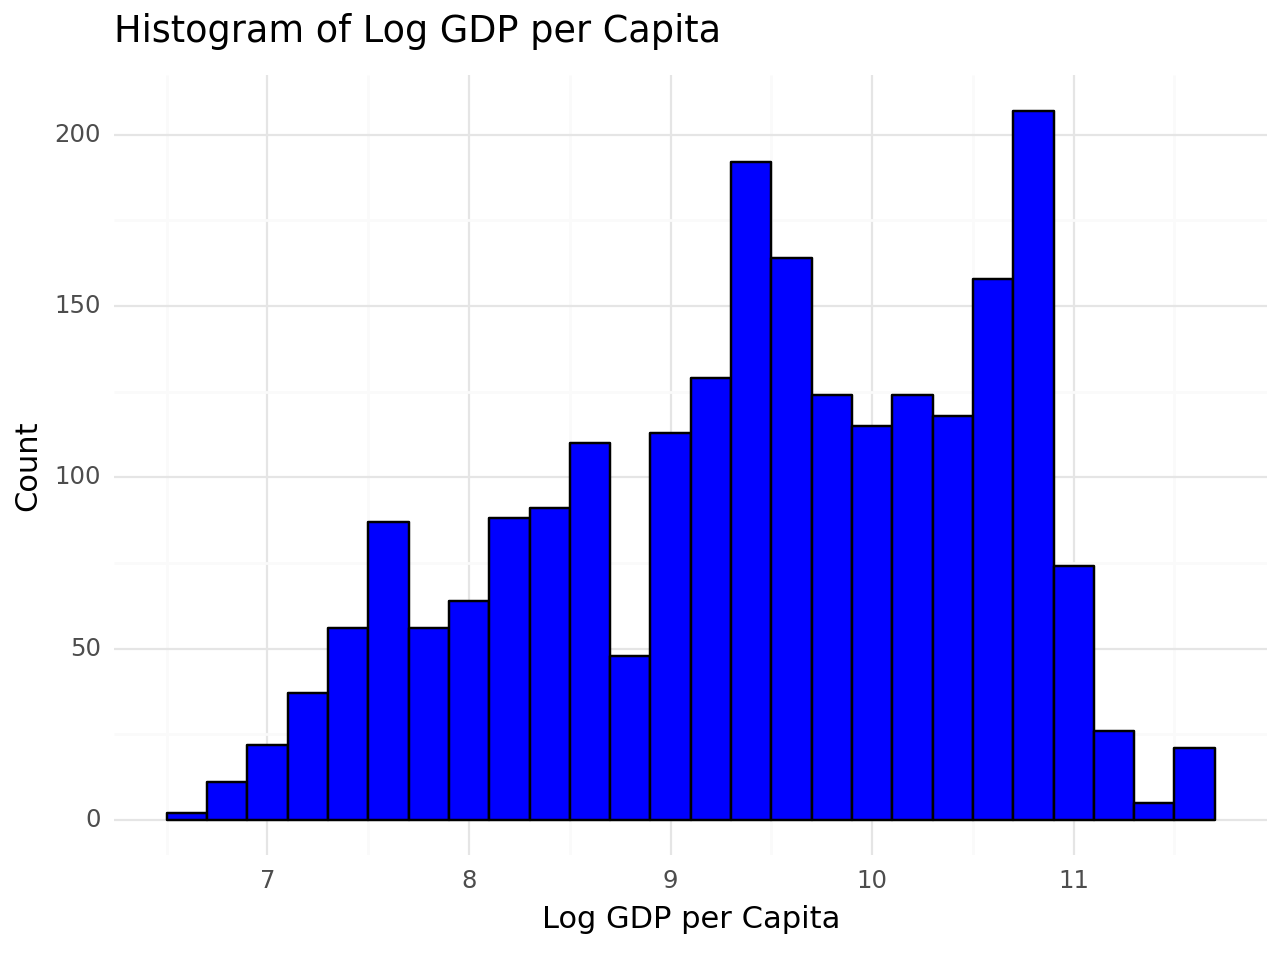

In [52]:
from plotnine import *

#Histogram for Log_GDP_per_capita
histogram_log_gdp = (ggplot(new_dataset, aes(x='Log_GDP_per_capita'))
                     + geom_histogram(binwidth=0.2, fill='blue', color='black')
                     + theme_minimal()
                     + labs(title='Histogram of Log GDP per Capita', x='Log GDP per Capita', y='Count'))

print(histogram_log_gdp)

**Histogram for Generosity**

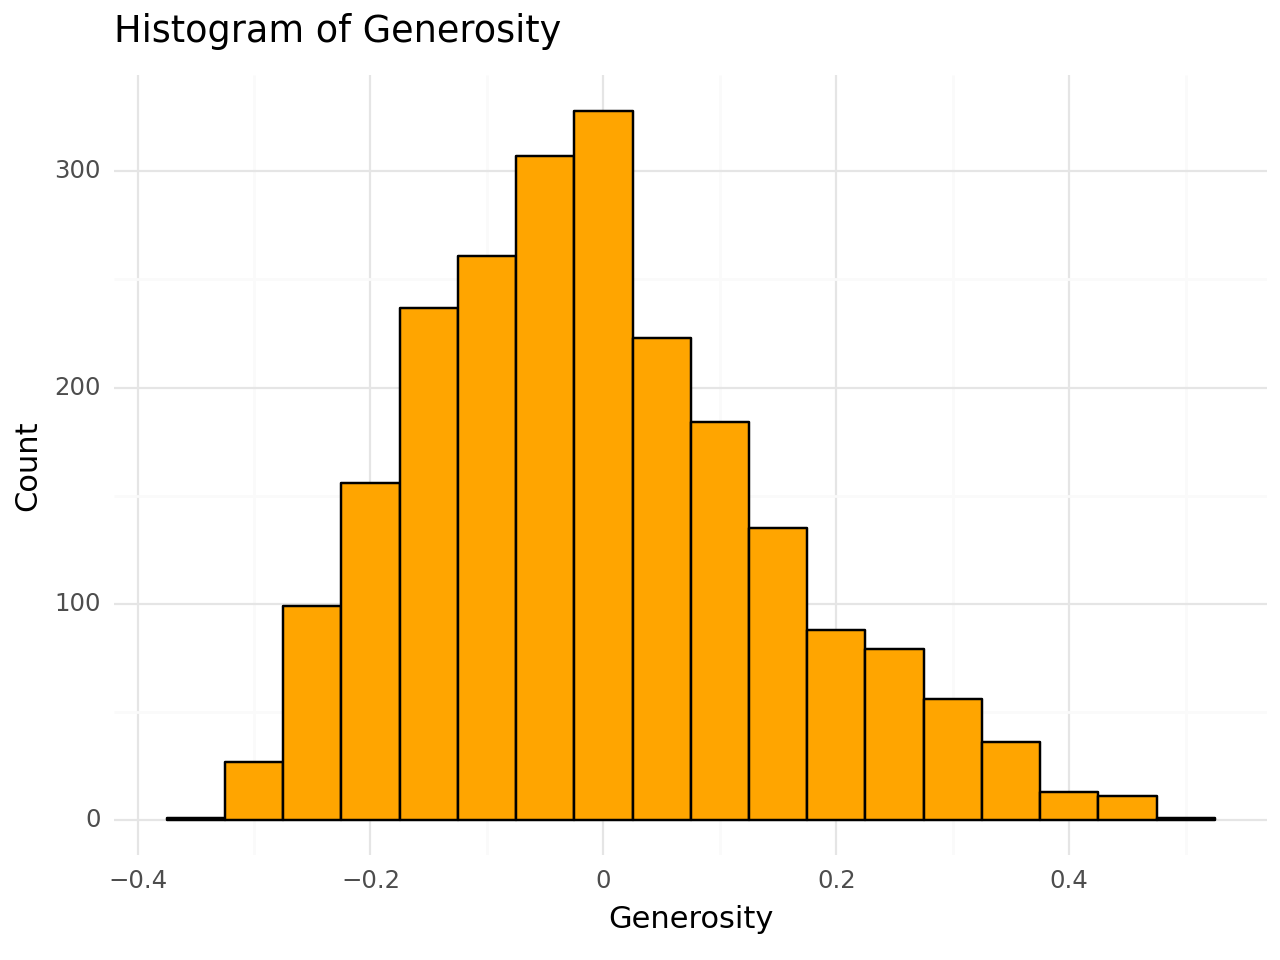

In [53]:
#Histogram for Generosity
histogram_generosity = (ggplot(new_dataset, aes(x='Generosity'))
                        + geom_histogram(binwidth=0.05, fill='orange', color='black')
                        + theme_minimal()
                        + labs(title='Histogram of Generosity', x='Generosity', y='Count'))

print(histogram_generosity)

**Histogram for Healthy life expectancy at birth**

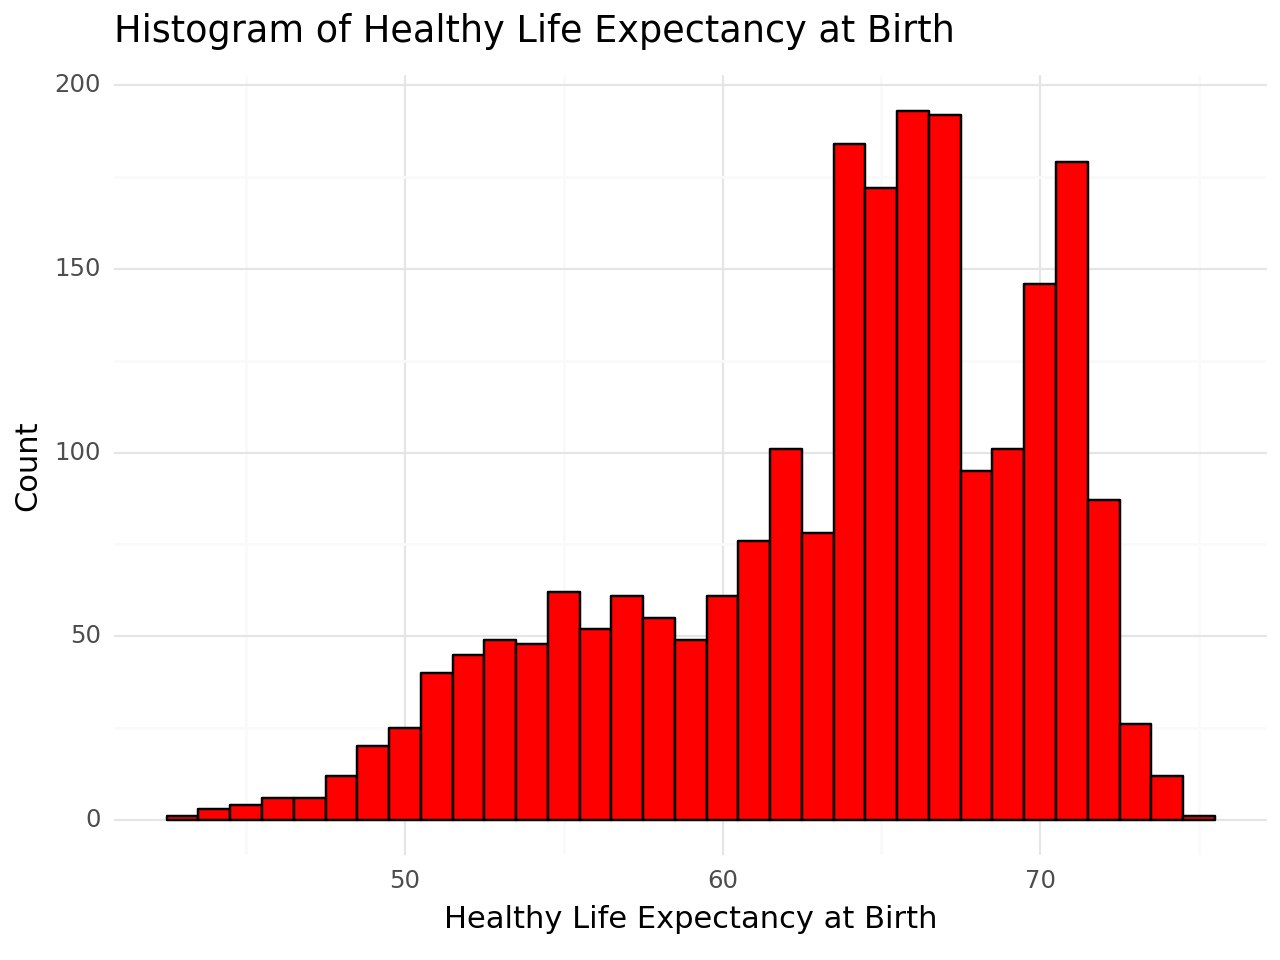

In [54]:
#Histogram for Healthy_life_expectancy_at_birth
histogram_life_expectancy = (ggplot(new_dataset, aes(x='Healthy_life_expectancy_at_birth'))
                             + geom_histogram(binwidth=1.0, fill='red', color='black')
                             + theme_minimal()
                             + labs(title='Histogram of Healthy Life Expectancy at Birth', x='Healthy Life Expectancy at Birth', y='Count'))

print(histogram_life_expectancy)

**Scatter plot of GDP per capita vs. happiness score by Year**

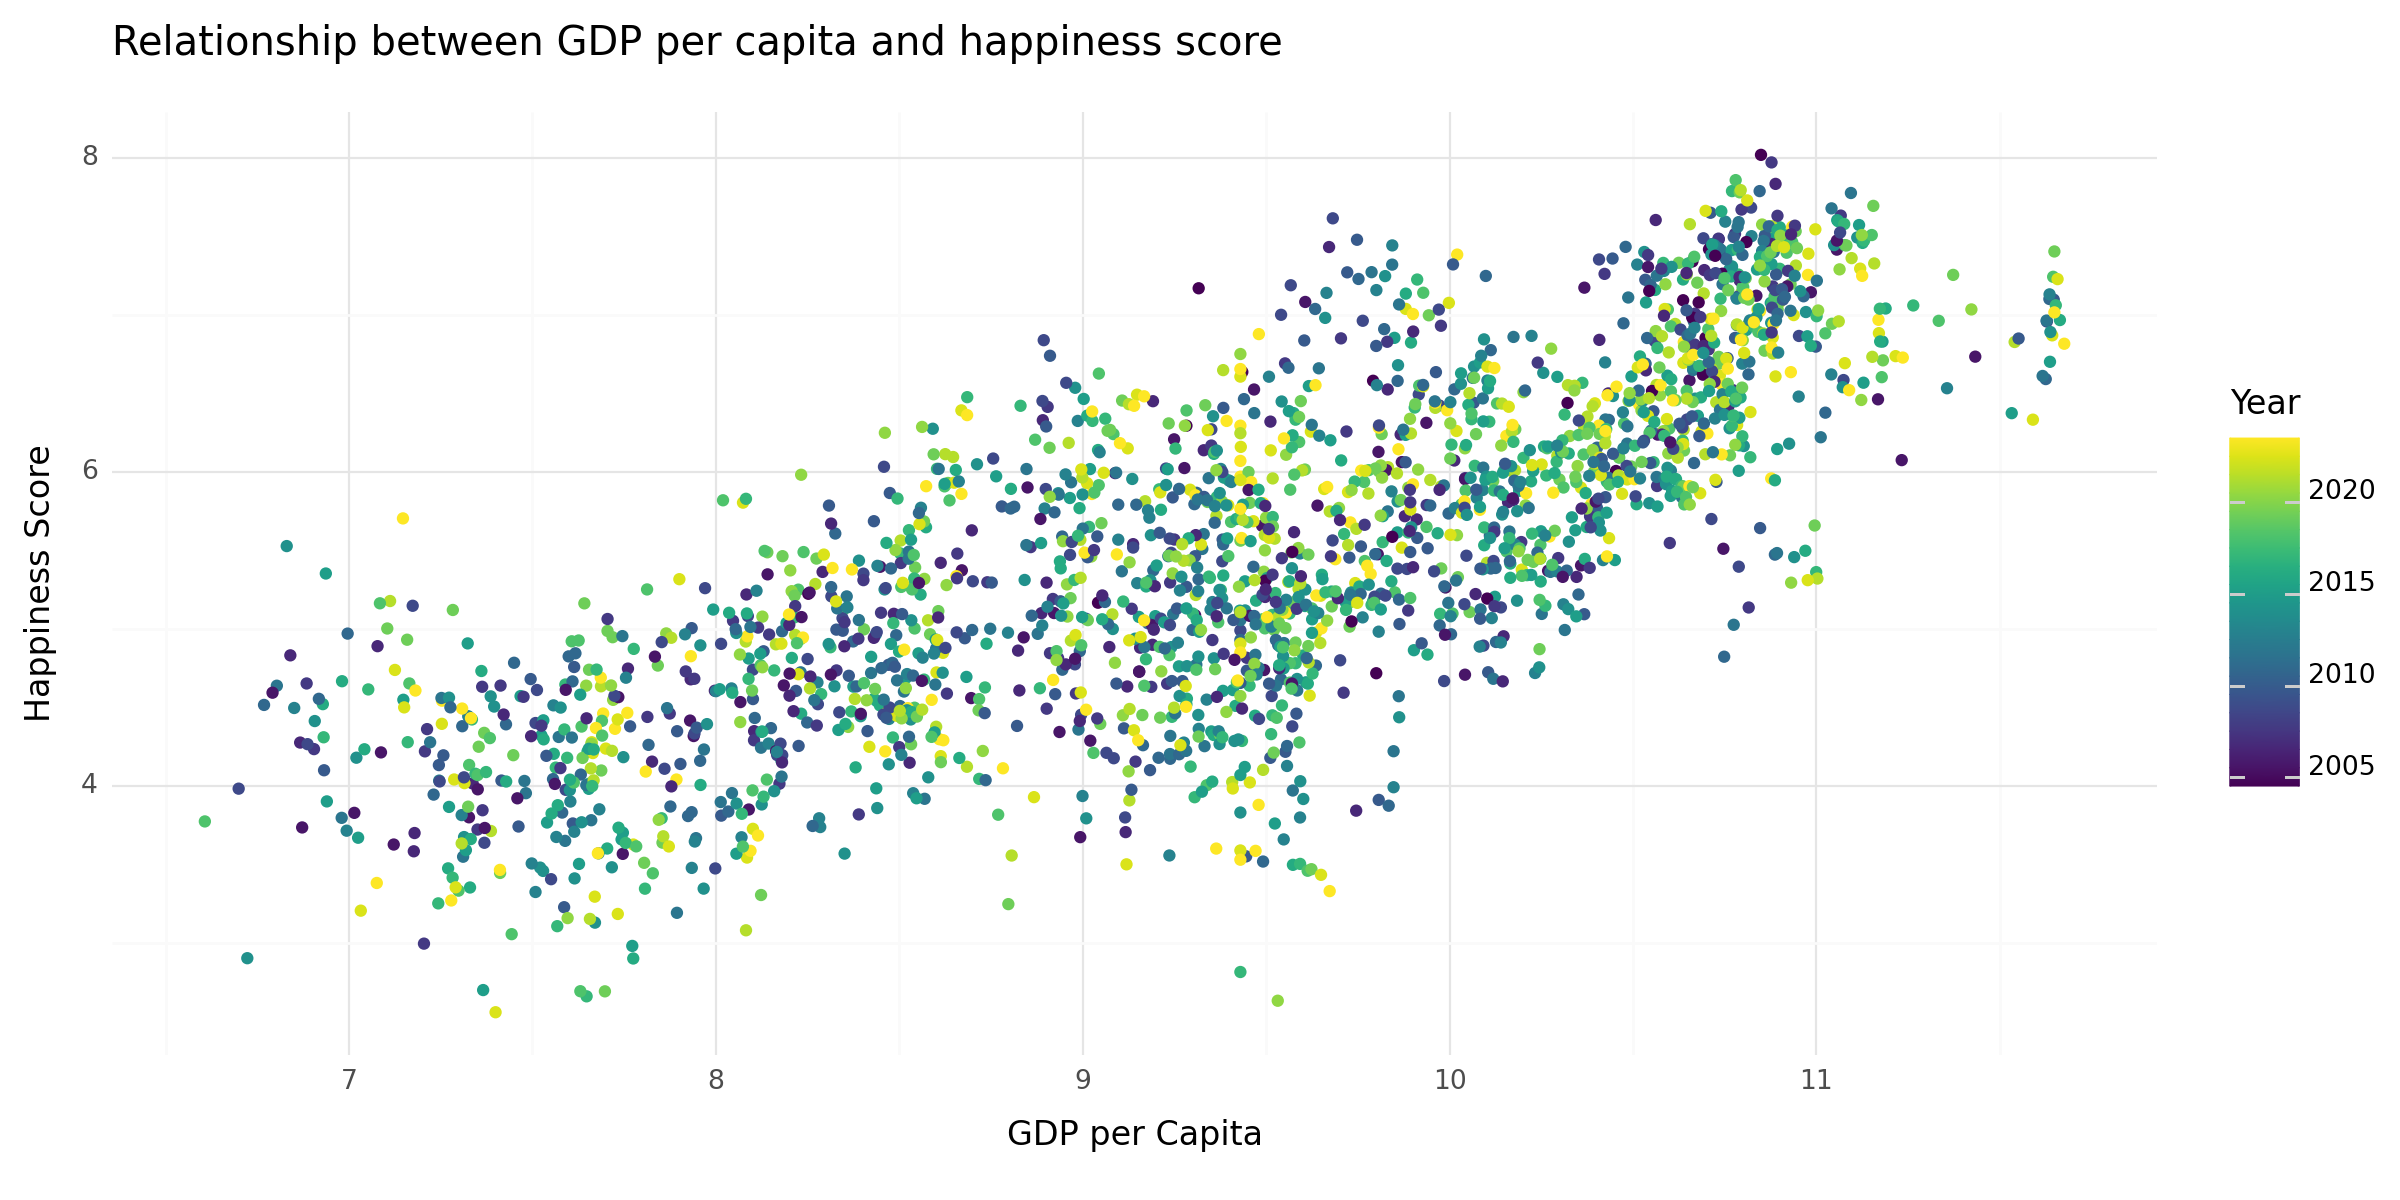

<Figure Size: (1200 x 600)>

In [55]:
(ggplot(new_dataset, aes(x='Log_GDP_per_capita', y='Life_Ladder', color='year'))
 + geom_point()
 + theme_minimal(base_size=12)
 + theme(figure_size=(12, 6))
 + labs(title='Relationship between GDP per capita and happiness score',
        x='GDP per Capita',
        y='Happiness Score',
        color='Year')
 + scale_color_cmap(cmap_name='viridis')
)

**Scatter plot of GDP per capita vs. happiness score by Region**

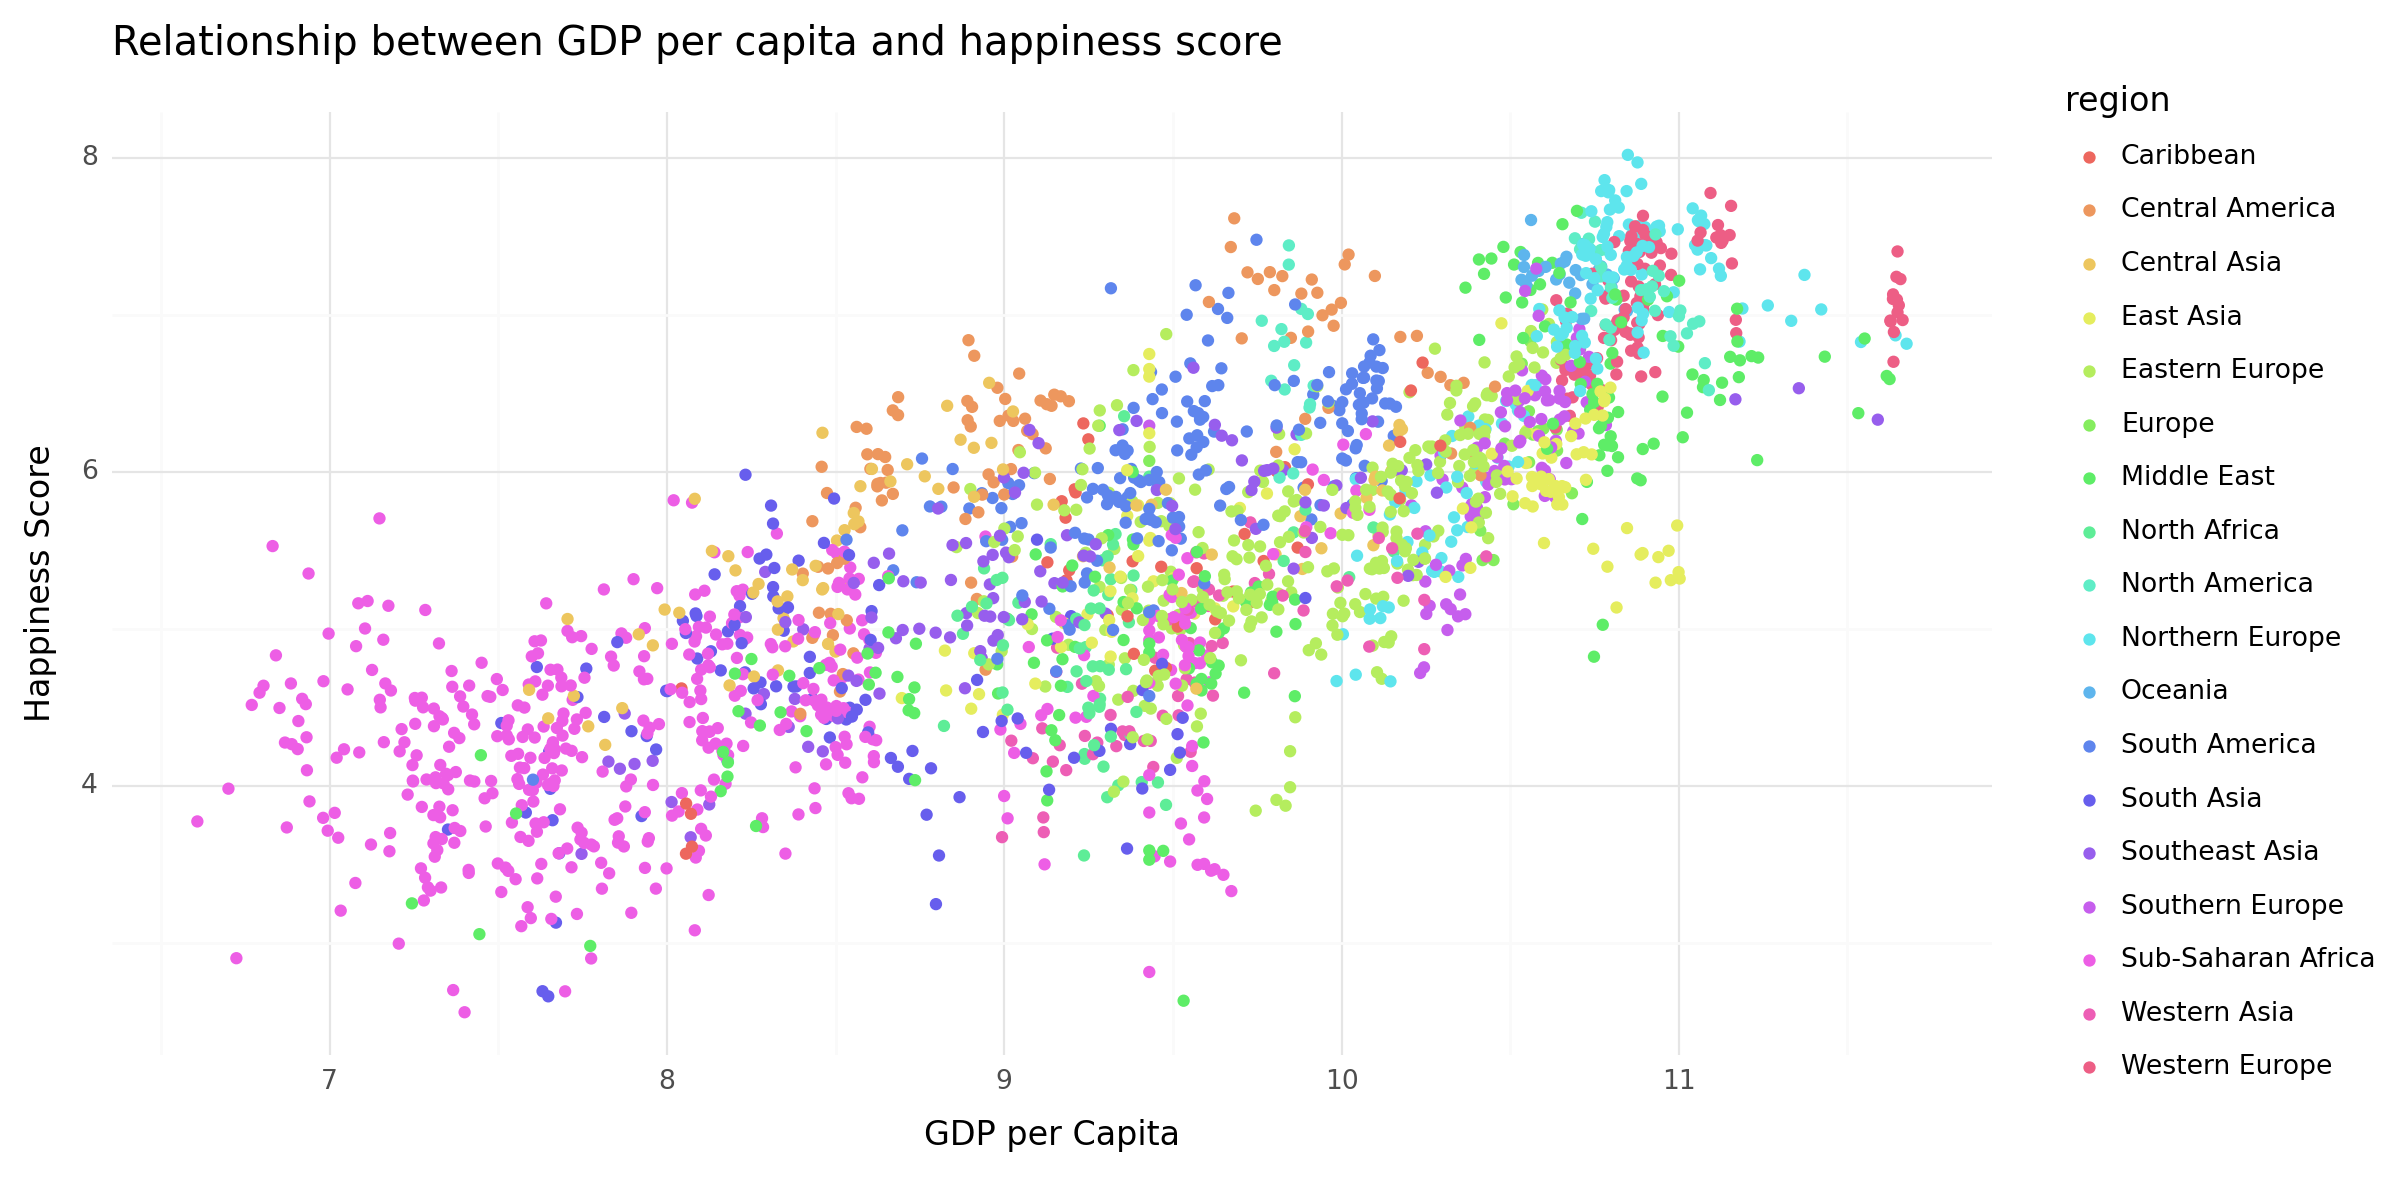

<Figure Size: (1200 x 600)>

In [56]:
(ggplot(new_dataset, aes(x='Log_GDP_per_capita', y='Life_Ladder', color='region'))
 + geom_point()
 + theme_minimal(base_size=12)
 + theme(figure_size=(12, 6))
 + labs(title='Relationship between GDP per capita and happiness score',
        x='GDP per Capita',
        y='Happiness Score')
 + scale_color_hue(s=0.8, l=0.65)
)

**Scatter plot of Social Support vs. Happiness Score by Region**

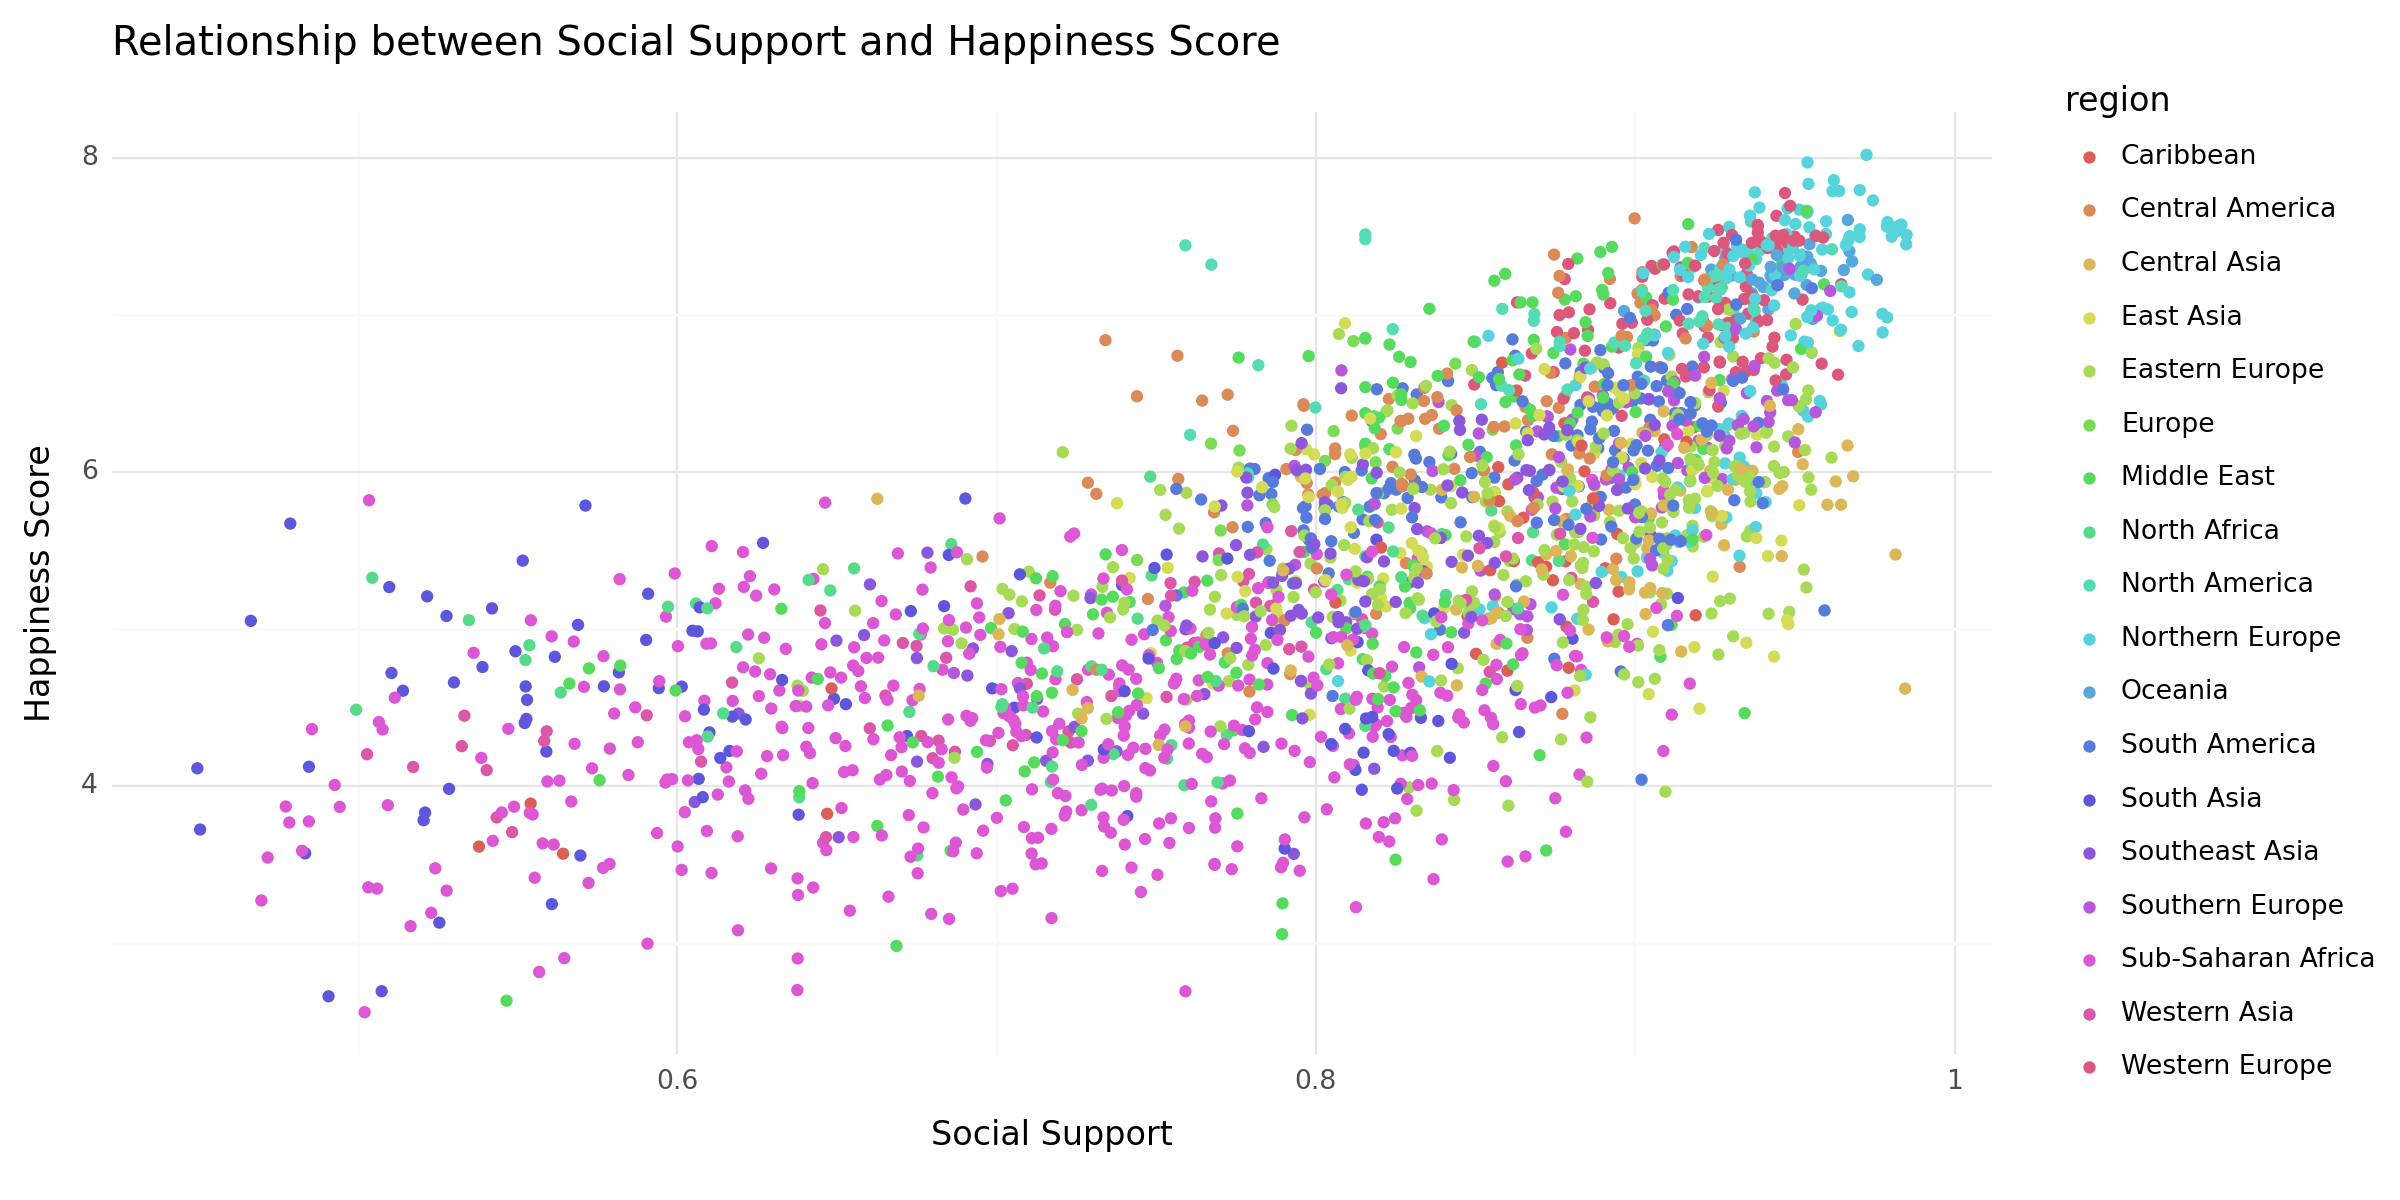

<Figure Size: (1200 x 600)>

In [57]:
(ggplot(new_dataset, aes(x='Social_Support', y='Life_Ladder', color='region'))
 + geom_point()
 + theme_minimal(base_size=12)
 + theme(figure_size=(12, 6))
 + labs(title='Relationship between Social Support and Happiness Score',
        x='Social Support',
        y='Happiness Score')
 + scale_color_discrete()
)

**Scatter plot of Healthy Life Expectancy at birth vs. Happiness Score by Continent**

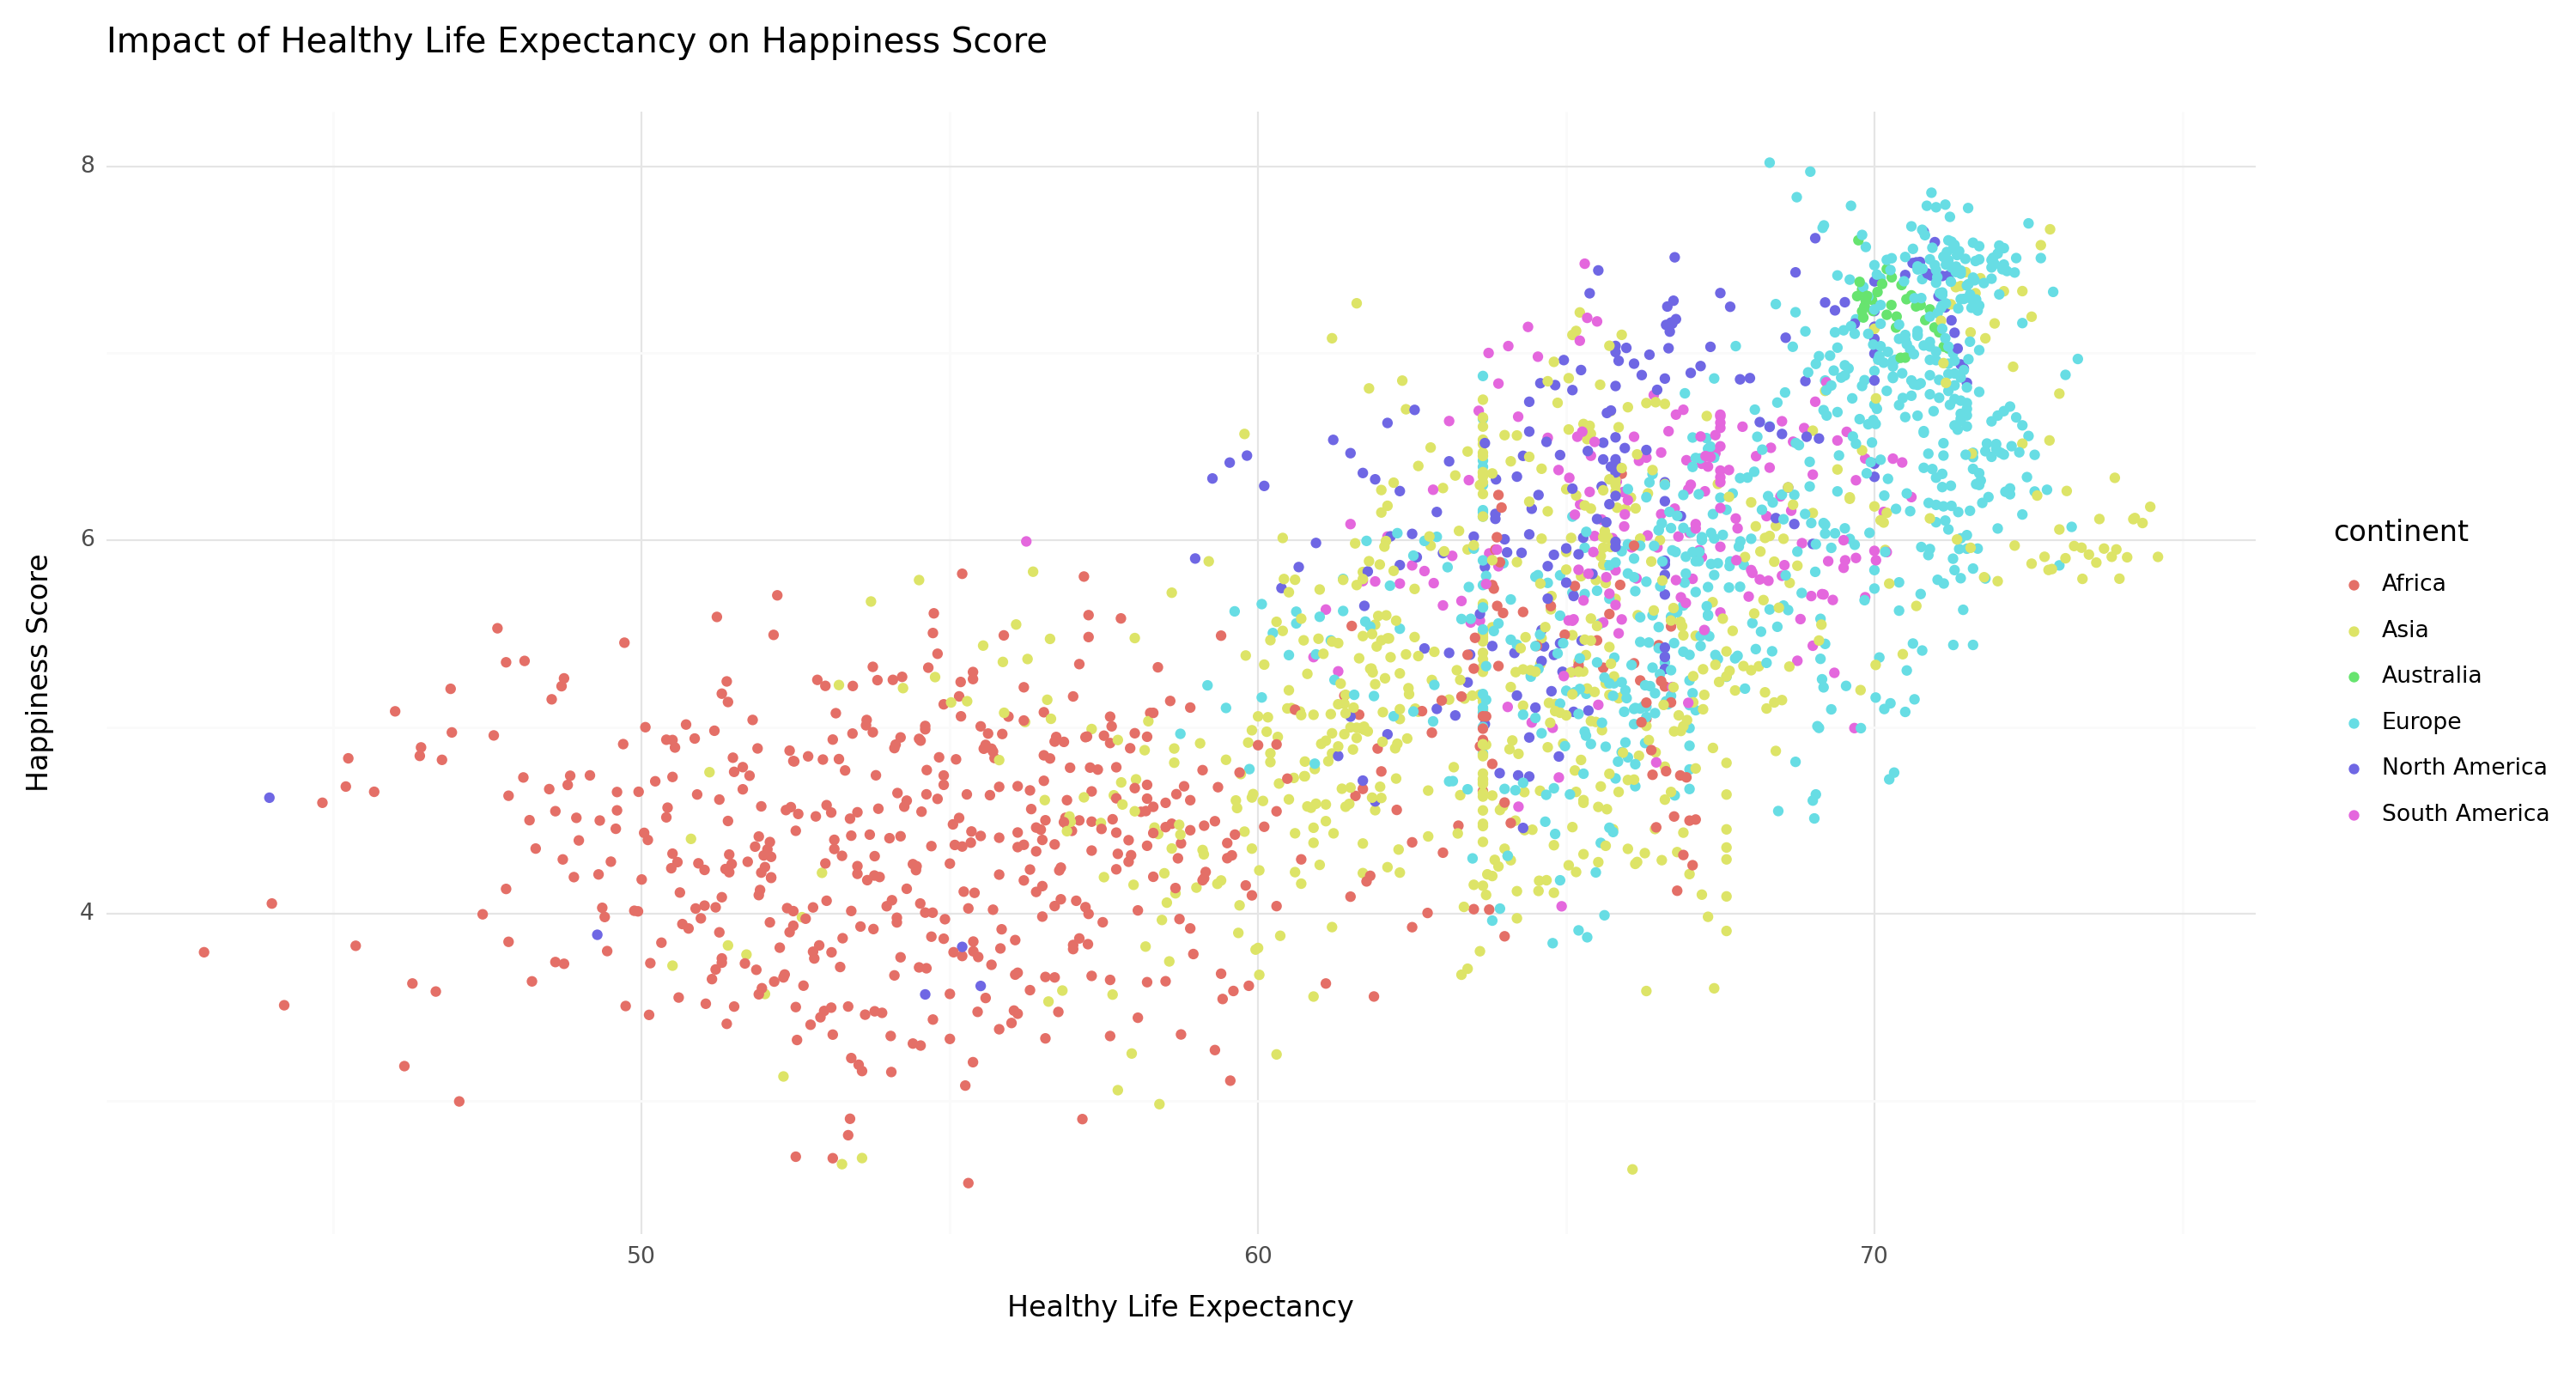

<Figure Size: (1500 x 800)>

In [58]:
(ggplot(new_dataset, aes(x='Healthy_life_expectancy_at_birth', y='Life_Ladder', color='continent'))
 + geom_point()
 + theme_minimal(base_size=12)
 + theme(figure_size=(15, 8))
 + labs(title='Impact of Healthy Life Expectancy on Happiness Score',
        x='Healthy Life Expectancy',
        y='Happiness Score')
 + scale_color_hue(s=0.7, l=0.65)
)

**Dual-axis line chart of Generosity and Log GDP per capita over time**

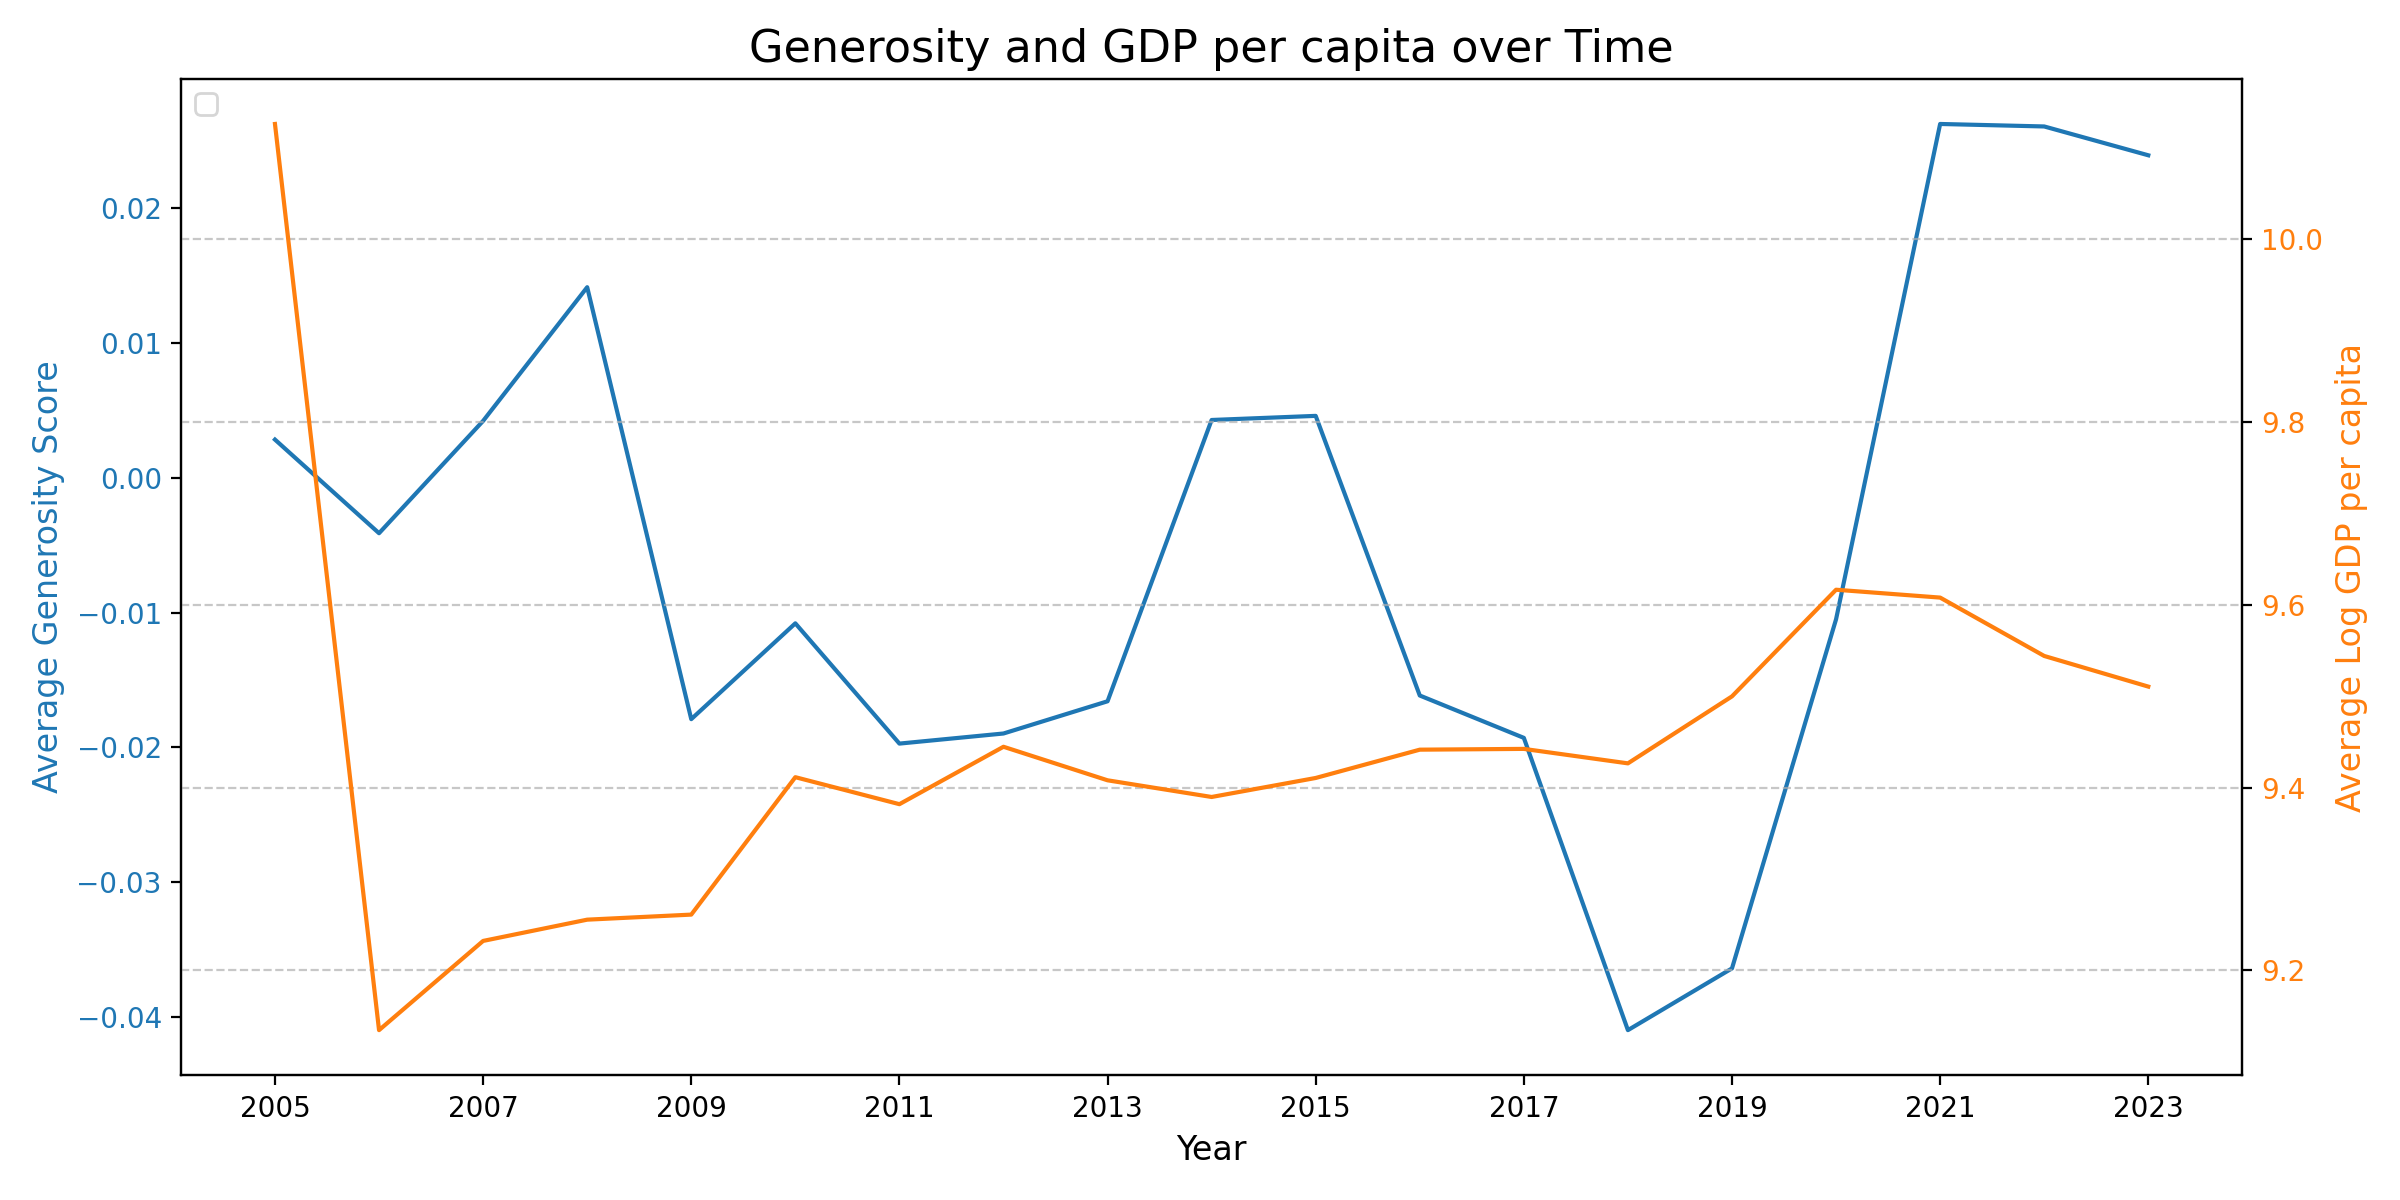

Correlation between Generosity and Log GDP per capita: 0.1490
    year  Generosity  Log_GDP_per_capita
0   2005    0.002837           10.125996
1   2006   -0.004109            9.134576
2   2007    0.004224            9.232175
3   2008    0.014142            9.255443
4   2009   -0.017903            9.260975
5   2010   -0.010795            9.411330
6   2011   -0.019717            9.381787
7   2012   -0.018968            9.444604
8   2013   -0.016577            9.407919
9   2014    0.004292            9.389667
10  2015    0.004597            9.410465
11  2016   -0.016149            9.441433
12  2017   -0.019292            9.442283
13  2018   -0.040976            9.426454
14  2019   -0.036394            9.499749
15  2020   -0.010495            9.616420
16  2021    0.026253            9.607816
17  2022    0.026069            9.543956
18  2023    0.023930            9.510438


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

#Preparing the data
yearly_data = new_dataset.groupby('year').agg({
    'Generosity': 'mean',
    'Log_GDP_per_capita': 'mean'
}).reset_index()

#Creating the dual-axis line chart
fig, ax1 = plt.subplots(figsize=(12, 6))

#Plotting Generosity on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Average Generosity Score', color=color, fontsize=12)
ax1.plot(yearly_data['year'], yearly_data['Generosity'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

#Creating a second y-axis for GDP
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Average Log GDP per capita', color=color, fontsize=12)
ax2.plot(yearly_data['year'], yearly_data['Log_GDP_per_capita'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Customizing the plot
plt.title('Generosity and GDP per capita over Time', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

#Improving x-axis ticks
plt.xticks(yearly_data['year'][::2], rotation=45)  #Show every other year

#Adding legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, ['Generosity', 'Log GDP per capita'], loc='upper left')

plt.tight_layout()
plt.show()

#Printing correlation coefficient
correlation = yearly_data['Generosity'].corr(yearly_data['Log_GDP_per_capita'])
print(f"Correlation between Generosity and Log GDP per capita: {correlation:.4f}")

#Printing the data
print(yearly_data)

**Heatmap of correlation between Social Support and Freedom to make life choices**

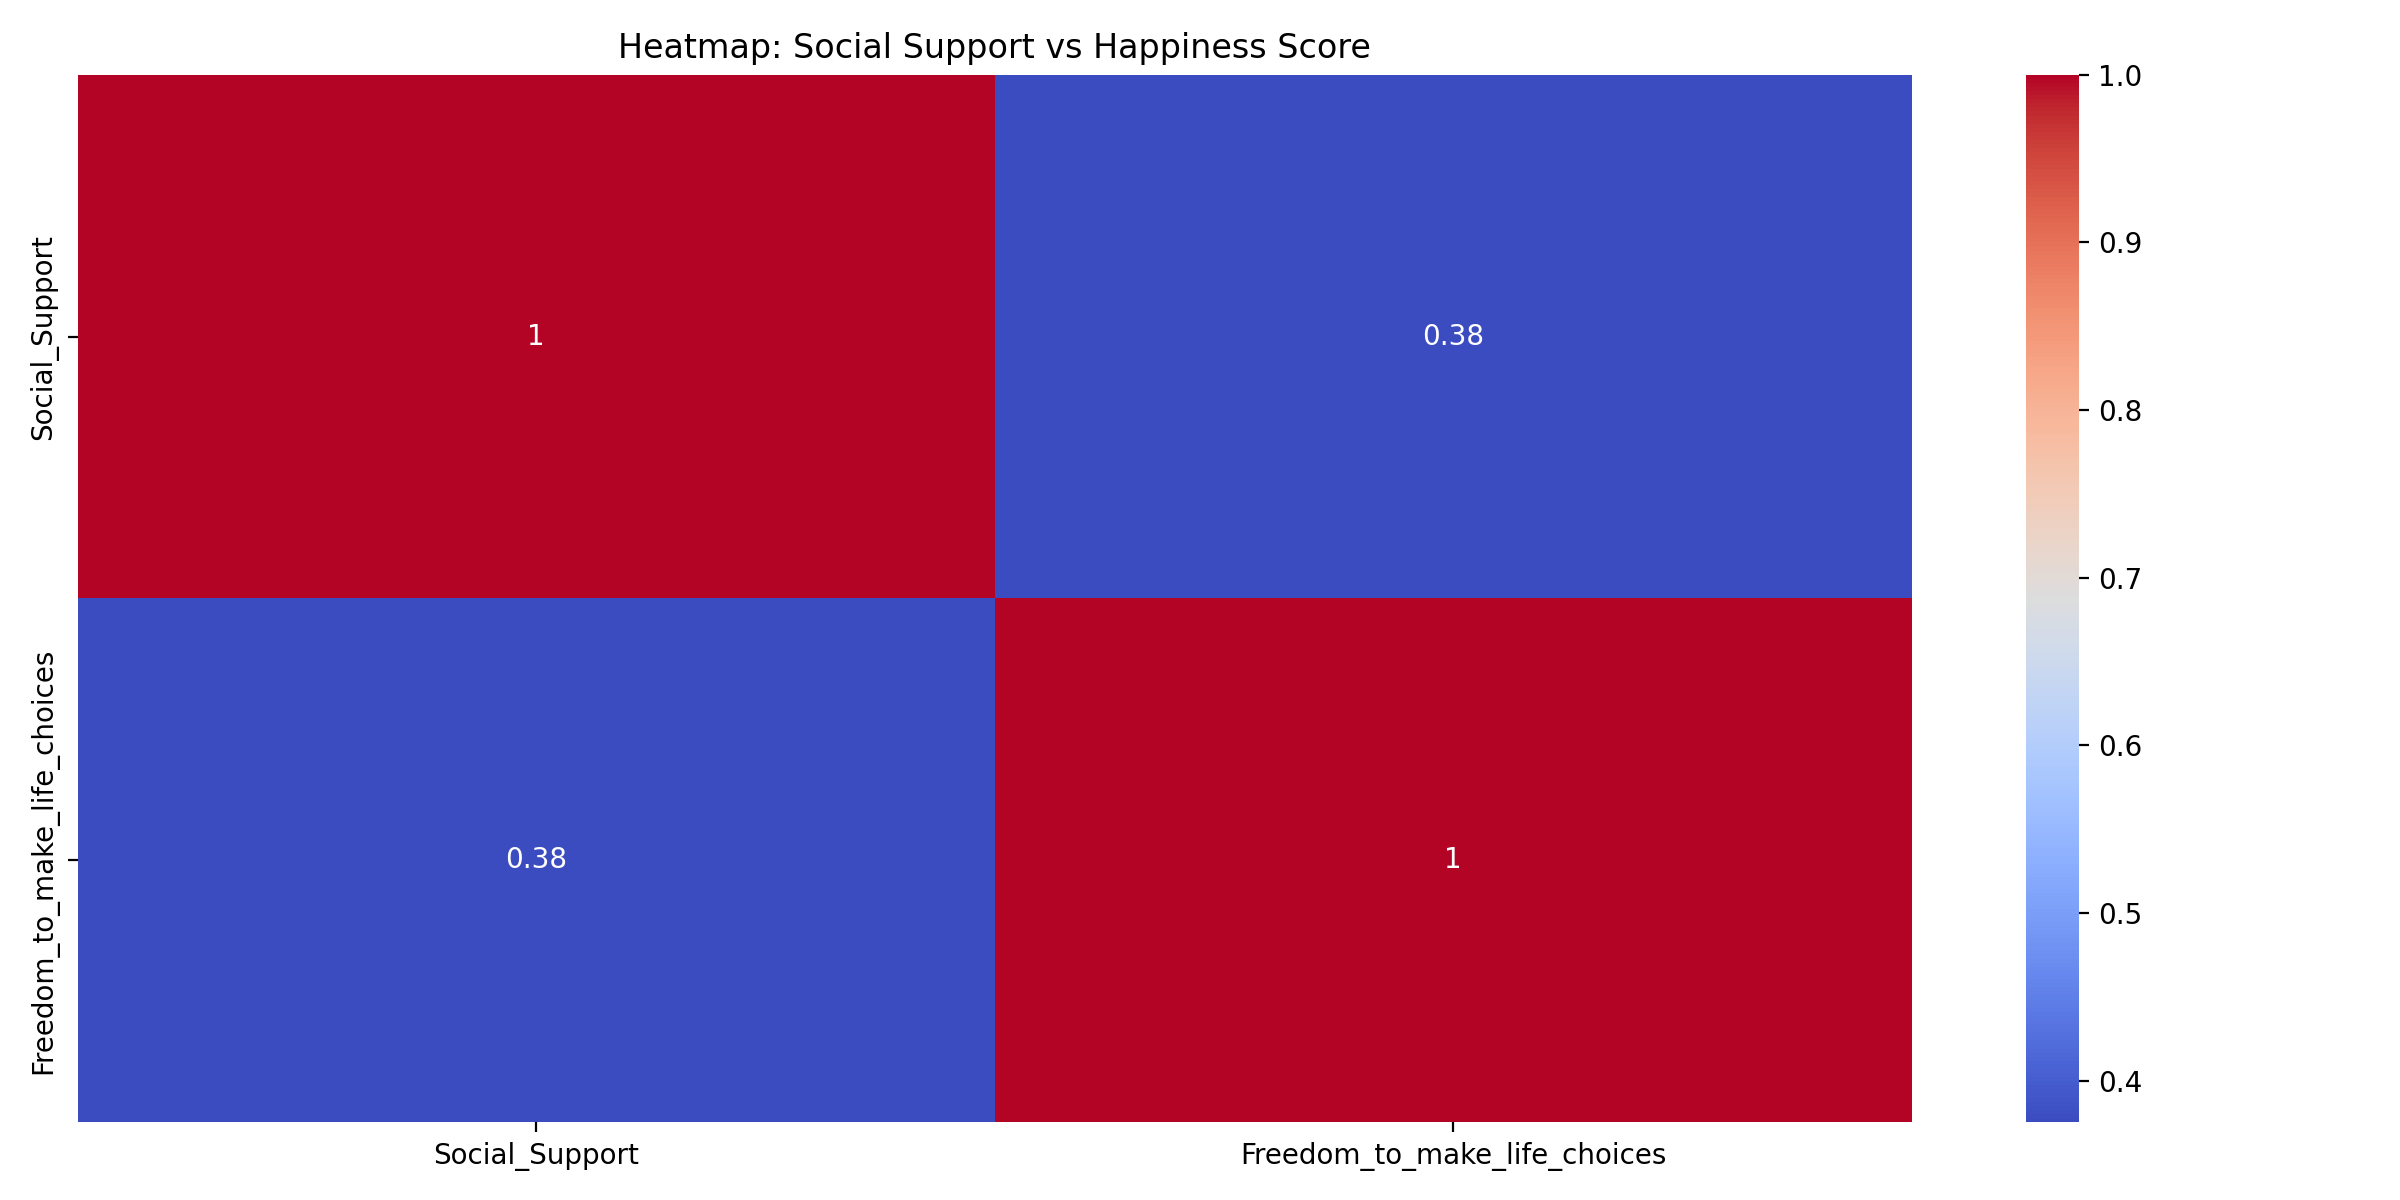

Correlation coefficient between Social Support and Happiness Score: 0.3752


In [60]:
#Selecting the relevant columns
data = new_dataset[['Social_Support', 'Freedom_to_make_life_choices']]

#Calculating the correlation matrix
corr_matrix = data.corr()

#Creating a figure with two subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

#Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax1)
ax1.set_title('Heatmap: Social Support vs Happiness Score')

#Adjusting layout and display the plot
plt.tight_layout()
plt.show()

#Printing the correlation coefficient
correlation = corr_matrix.loc['Social_Support', 'Freedom_to_make_life_choices']
print(f"Correlation coefficient between Social Support and Happiness Score: {correlation:.4f}")

**Analysing relationship between Corruption Perception and Freedom to make life choices**


1.   A line plot showing Corruption Perception over time
2.   A scatter plot with a trend line showing the relationship between Corruption Perception and Freedom to make life choices



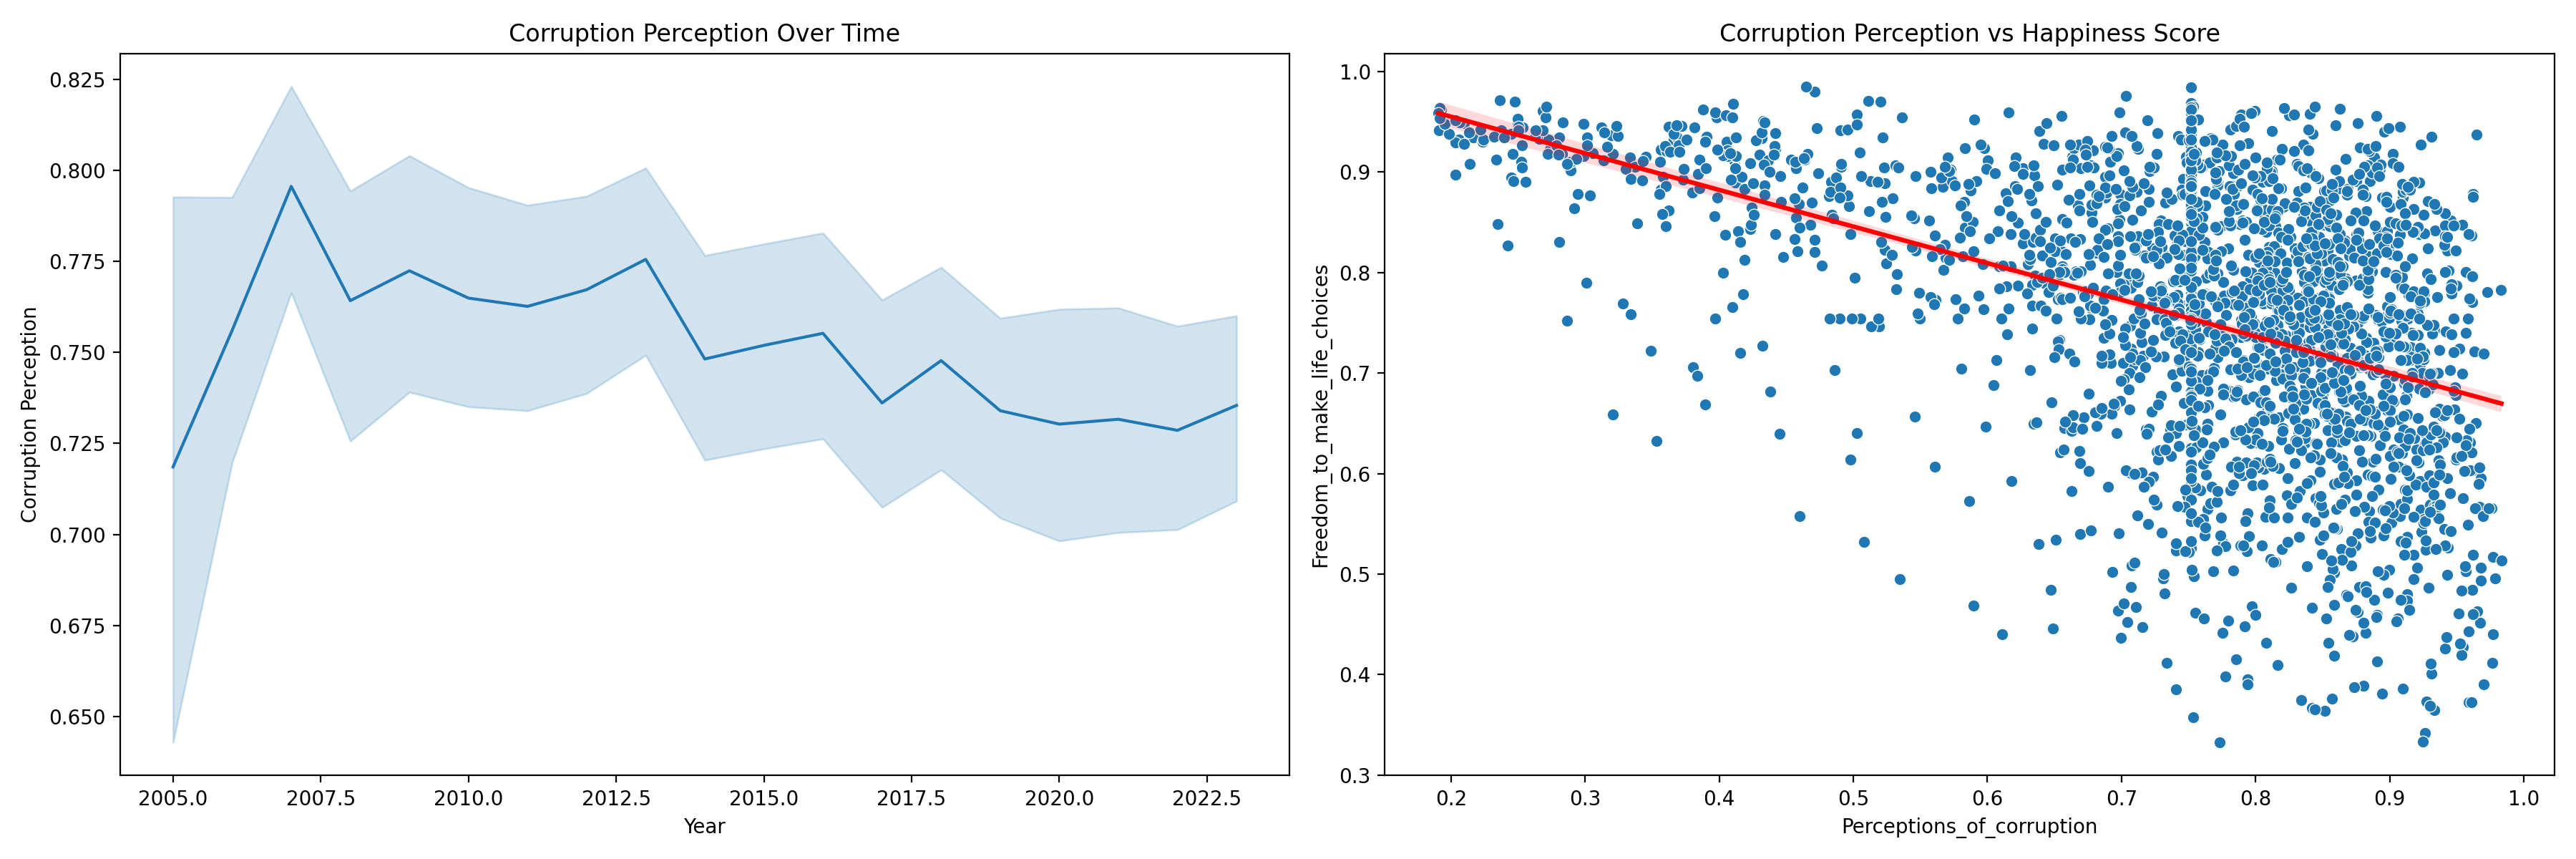

Correlation coefficient between Corruption Perception and Happiness Score: -0.4603

Yearly averages:
      Perceptions_of_corruption  Freedom_to_make_life_choices
year                                                         
2005                   0.718549                      0.824008
2006                   0.756029                      0.749272
2007                   0.795561                      0.692793
2008                   0.764182                      0.707339
2009                   0.772388                      0.690881
2010                   0.764884                      0.707608
2011                   0.762615                      0.740389
2012                   0.767192                      0.715722
2013                   0.775515                      0.726400
2014                   0.748168                      0.732697
2015                   0.751911                      0.747920
2016                   0.755216                      0.767164
2017                   0.736100

In [61]:
#Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

#Line plot: Corruption perception over time
sns.lineplot(data=new_dataset, x='year', y='Perceptions_of_corruption', ax=ax1)
ax1.set_title('Corruption Perception Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Corruption Perception')

#Scatter plot: Corruption vs Happiness Score
sns.scatterplot(data=new_dataset, x='Perceptions_of_corruption', y='Freedom_to_make_life_choices', ax=ax2)
ax2.set_title('Corruption Perception vs Happiness Score')
ax2.set_xlabel('Corruption Perception')
ax2.set_ylabel('Happiness Score')

#Adding a trend line to the scatter plot
sns.regplot(data=new_dataset, x='Perceptions_of_corruption', y='Freedom_to_make_life_choices',
            scatter=False, ax=ax2, color='red')

#Adjusting layout and display the plot
plt.tight_layout()
plt.show()

#Calculating and print the correlation coefficient
correlation = new_dataset['Perceptions_of_corruption'].corr(new_dataset['Freedom_to_make_life_choices'])
print(f"Correlation coefficient between Corruption Perception and Happiness Score: {correlation:.4f}")

#Calculating average corruption perception and Happiness Score by year
yearly_avg = new_dataset.groupby('year')[['Perceptions_of_corruption', 'Freedom_to_make_life_choices']].mean()
print("\nYearly averages:")
print(yearly_avg)

**Scatter plot with regression line for Freedom to Make Life Choices vs. Happiness Score**

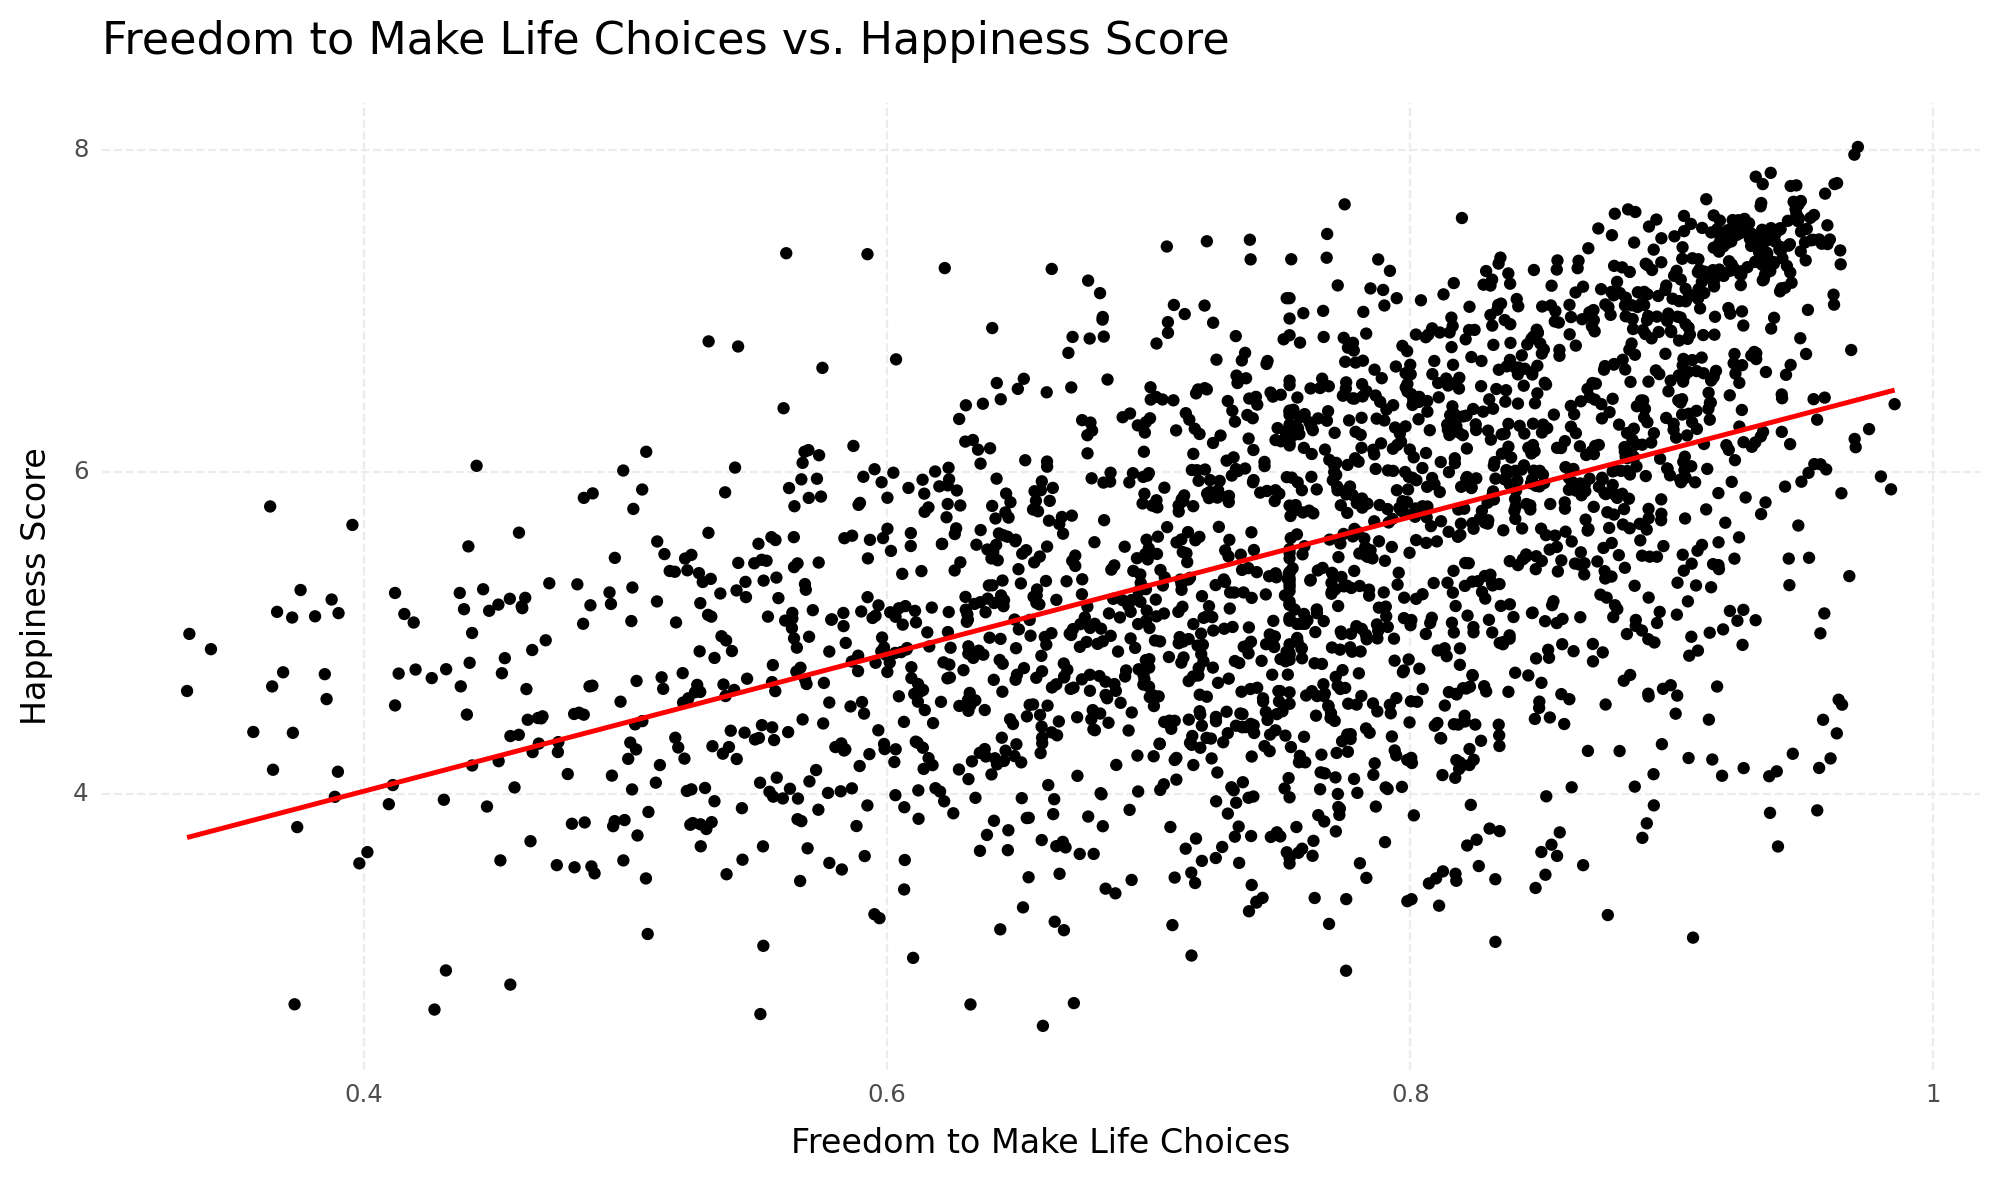

In [62]:
# Create the plot
p = (ggplot(new_dataset, aes(x='Freedom_to_make_life_choices', y='Life_Ladder'))
     + geom_point(alpha=1)  # Scatter plot
     + geom_smooth(method='lm', color='red', se=False)  # Regression line
     + labs(title='Freedom to Make Life Choices vs. Happiness Score',
            x='Freedom to Make Life Choices',
            y='Happiness Score')
     + theme_minimal()
     + theme(
         figure_size=(10, 6),
         plot_title=element_text(size=16),
         axis_title=element_text(size=12),
         panel_grid_major=element_line(linetype='--', alpha=0.7),
         panel_grid_minor=element_blank()
     )
)

# Display the plot
print(p)

**Global choropleth map of Happiness Scores**

In [63]:
import plotly.express as px

#Creating a choropleth map using Plotly Express
fig = px.choropleth(new_dataset, locations='Country_name', locationmode='country names', scope='world', color='Life_Ladder', color_continuous_scale='Viridis_r')

#Updating the layout of the map
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0}, coloraxis_colorbar=dict(title='Happiness Score', ticks='outside', tickvals=[1, 2, 3, 4, 5, 6, 7, 8], dtick=1))

fig.show()

**Analysing global happiness trends over time**

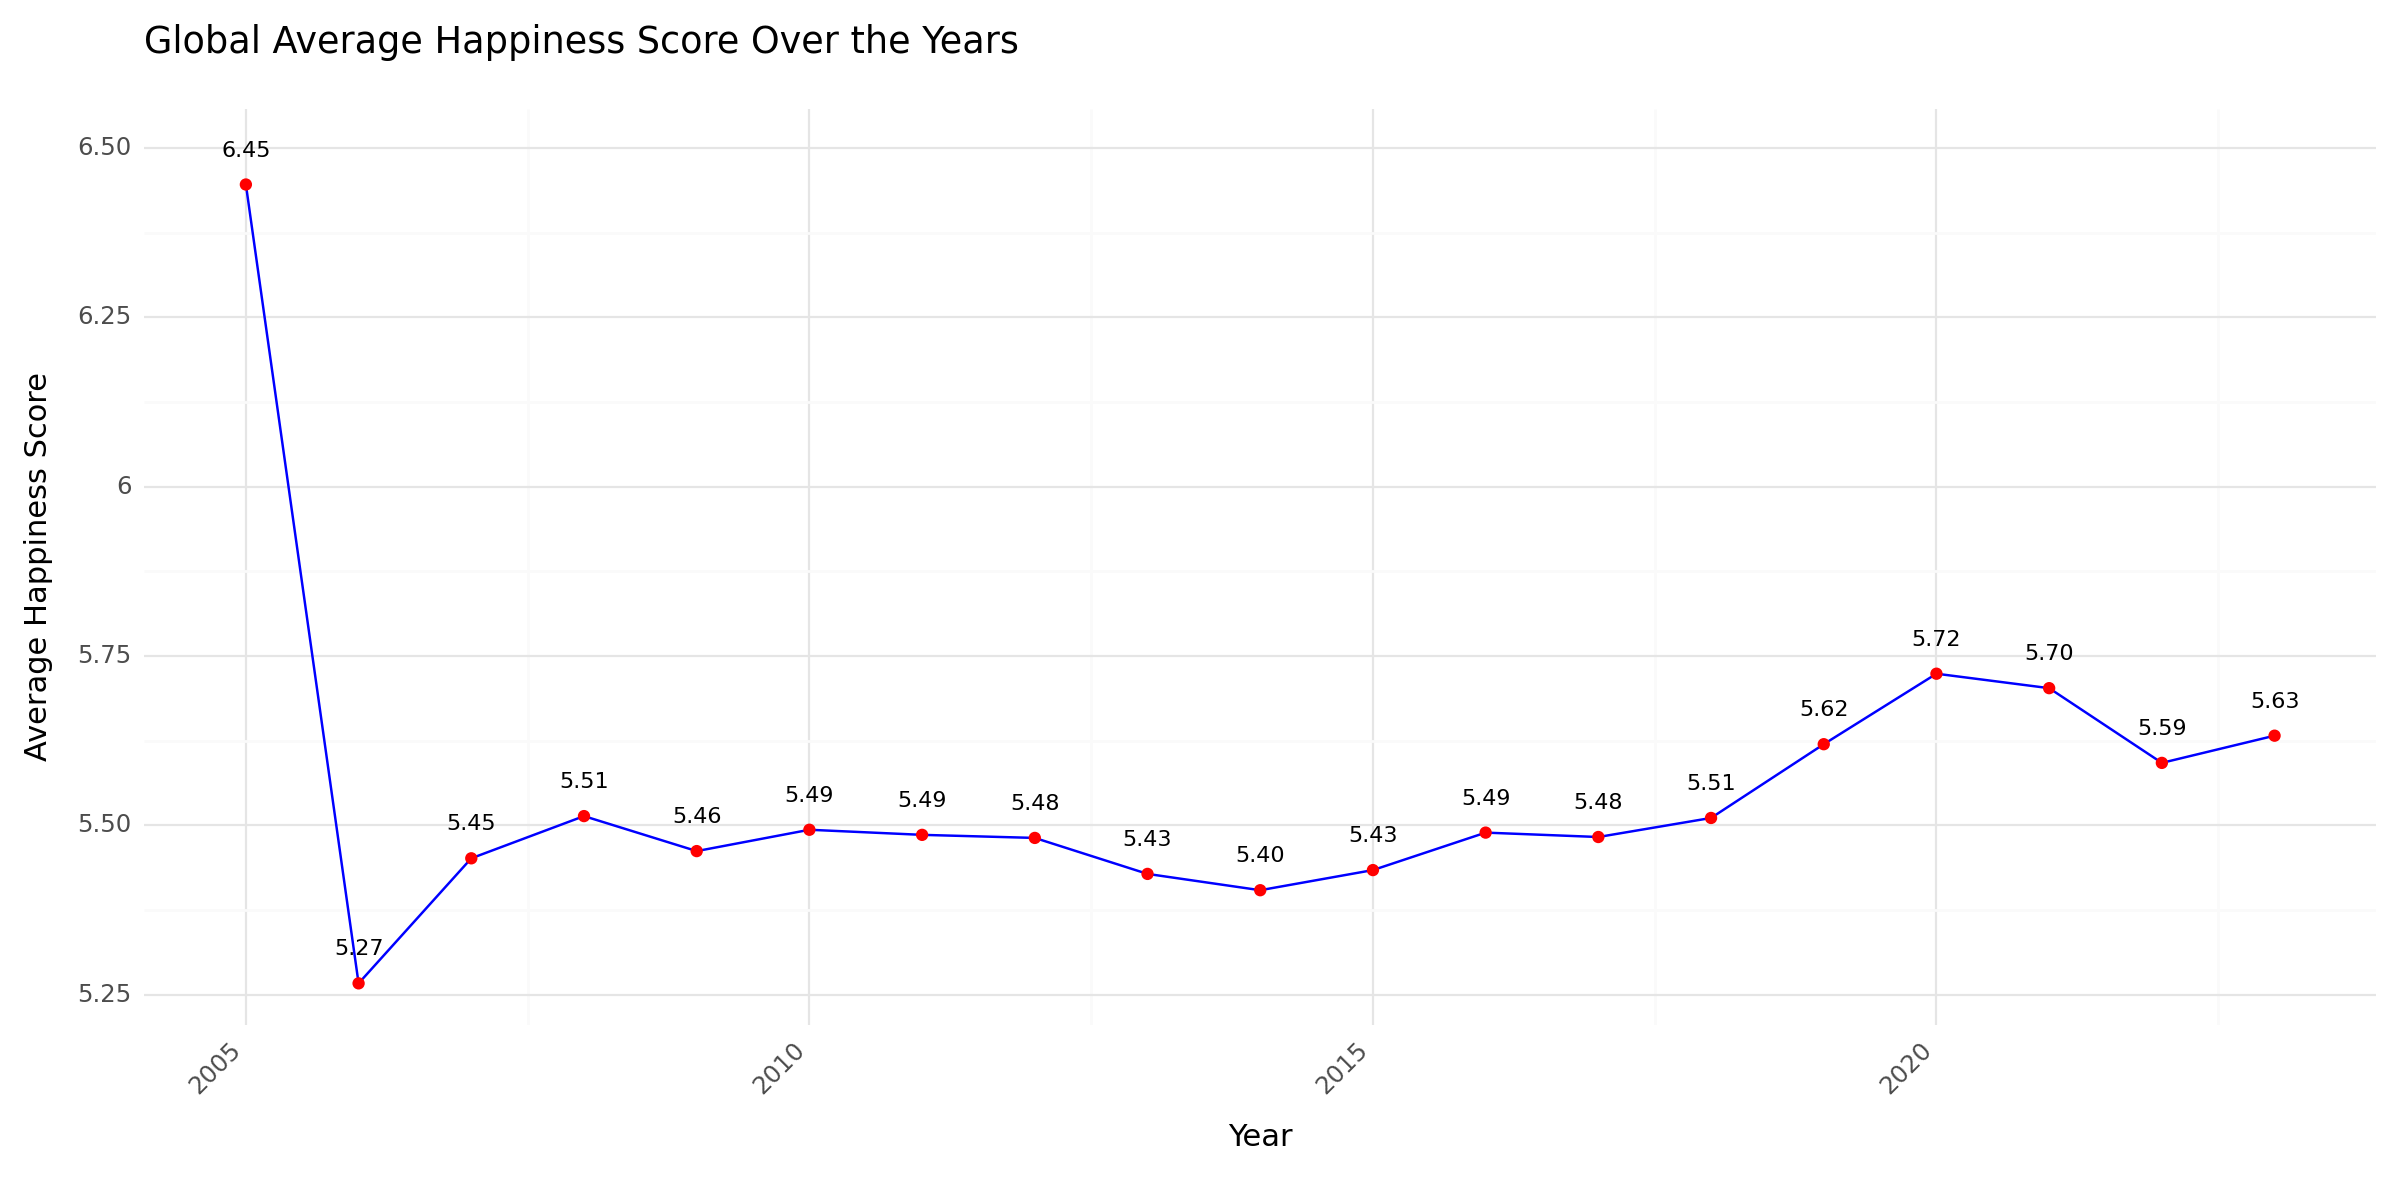



Overall trend from 2005 to 2023:
Change in average happiness score: -0.81
There has been an overall decrease in global happiness.

Year with highest average happiness: 2005.0 (Score: 6.45)
Year with lowest average happiness: 2006.0 (Score: 5.27)


In [64]:
#Calculating average happiness score for each year
yearly_avg = new_dataset.groupby('year')['Life_Ladder'].mean().reset_index()

plot = (
    ggplot(yearly_avg, aes(x='year', y='Life_Ladder')) +
    geom_line(color='blue') +
    geom_point(color='red') +
    geom_text(aes(label=yearly_avg['Life_Ladder'].apply(lambda x: f'{x:.2f}')), nudge_y=0.05, size=8) +
    labs(title='Global Average Happiness Score Over the Years',
         x='Year',
         y='Average Happiness Score') +
    theme_minimal() +
    theme(axis_text_x=element_text(rotation=45, hjust=1),
          figure_size=(12, 6))  # Set the figure size here
)

print(plot)

# Calculating overall trend
trend = yearly_avg['Life_Ladder'].iloc[-1] - yearly_avg['Life_Ladder'].iloc[0]
print(f"\nOverall trend from {yearly_avg['year'].iloc[0]} to {yearly_avg['year'].iloc[-1]}:")
print(f"Change in average happiness score: {trend:.2f}")

if trend > 0:
    print("There has been an overall increase in global happiness.")
elif trend < 0:
    print("There has been an overall decrease in global happiness.")
else:
    print("There has been no significant change in global happiness.")

# Identifying years with highest and lowest happiness scores
max_year = yearly_avg.loc[yearly_avg['Life_Ladder'].idxmax()]
min_year = yearly_avg.loc[yearly_avg['Life_Ladder'].idxmin()]

print(f"\nYear with highest average happiness: {max_year['year']} (Score: {max_year['Life_Ladder']:.2f})")
print(f"Year with lowest average happiness: {min_year['year']} (Score: {min_year['Life_Ladder']:.2f})")

**Bar chart of top 10 countries by Happiness Score in 2023**

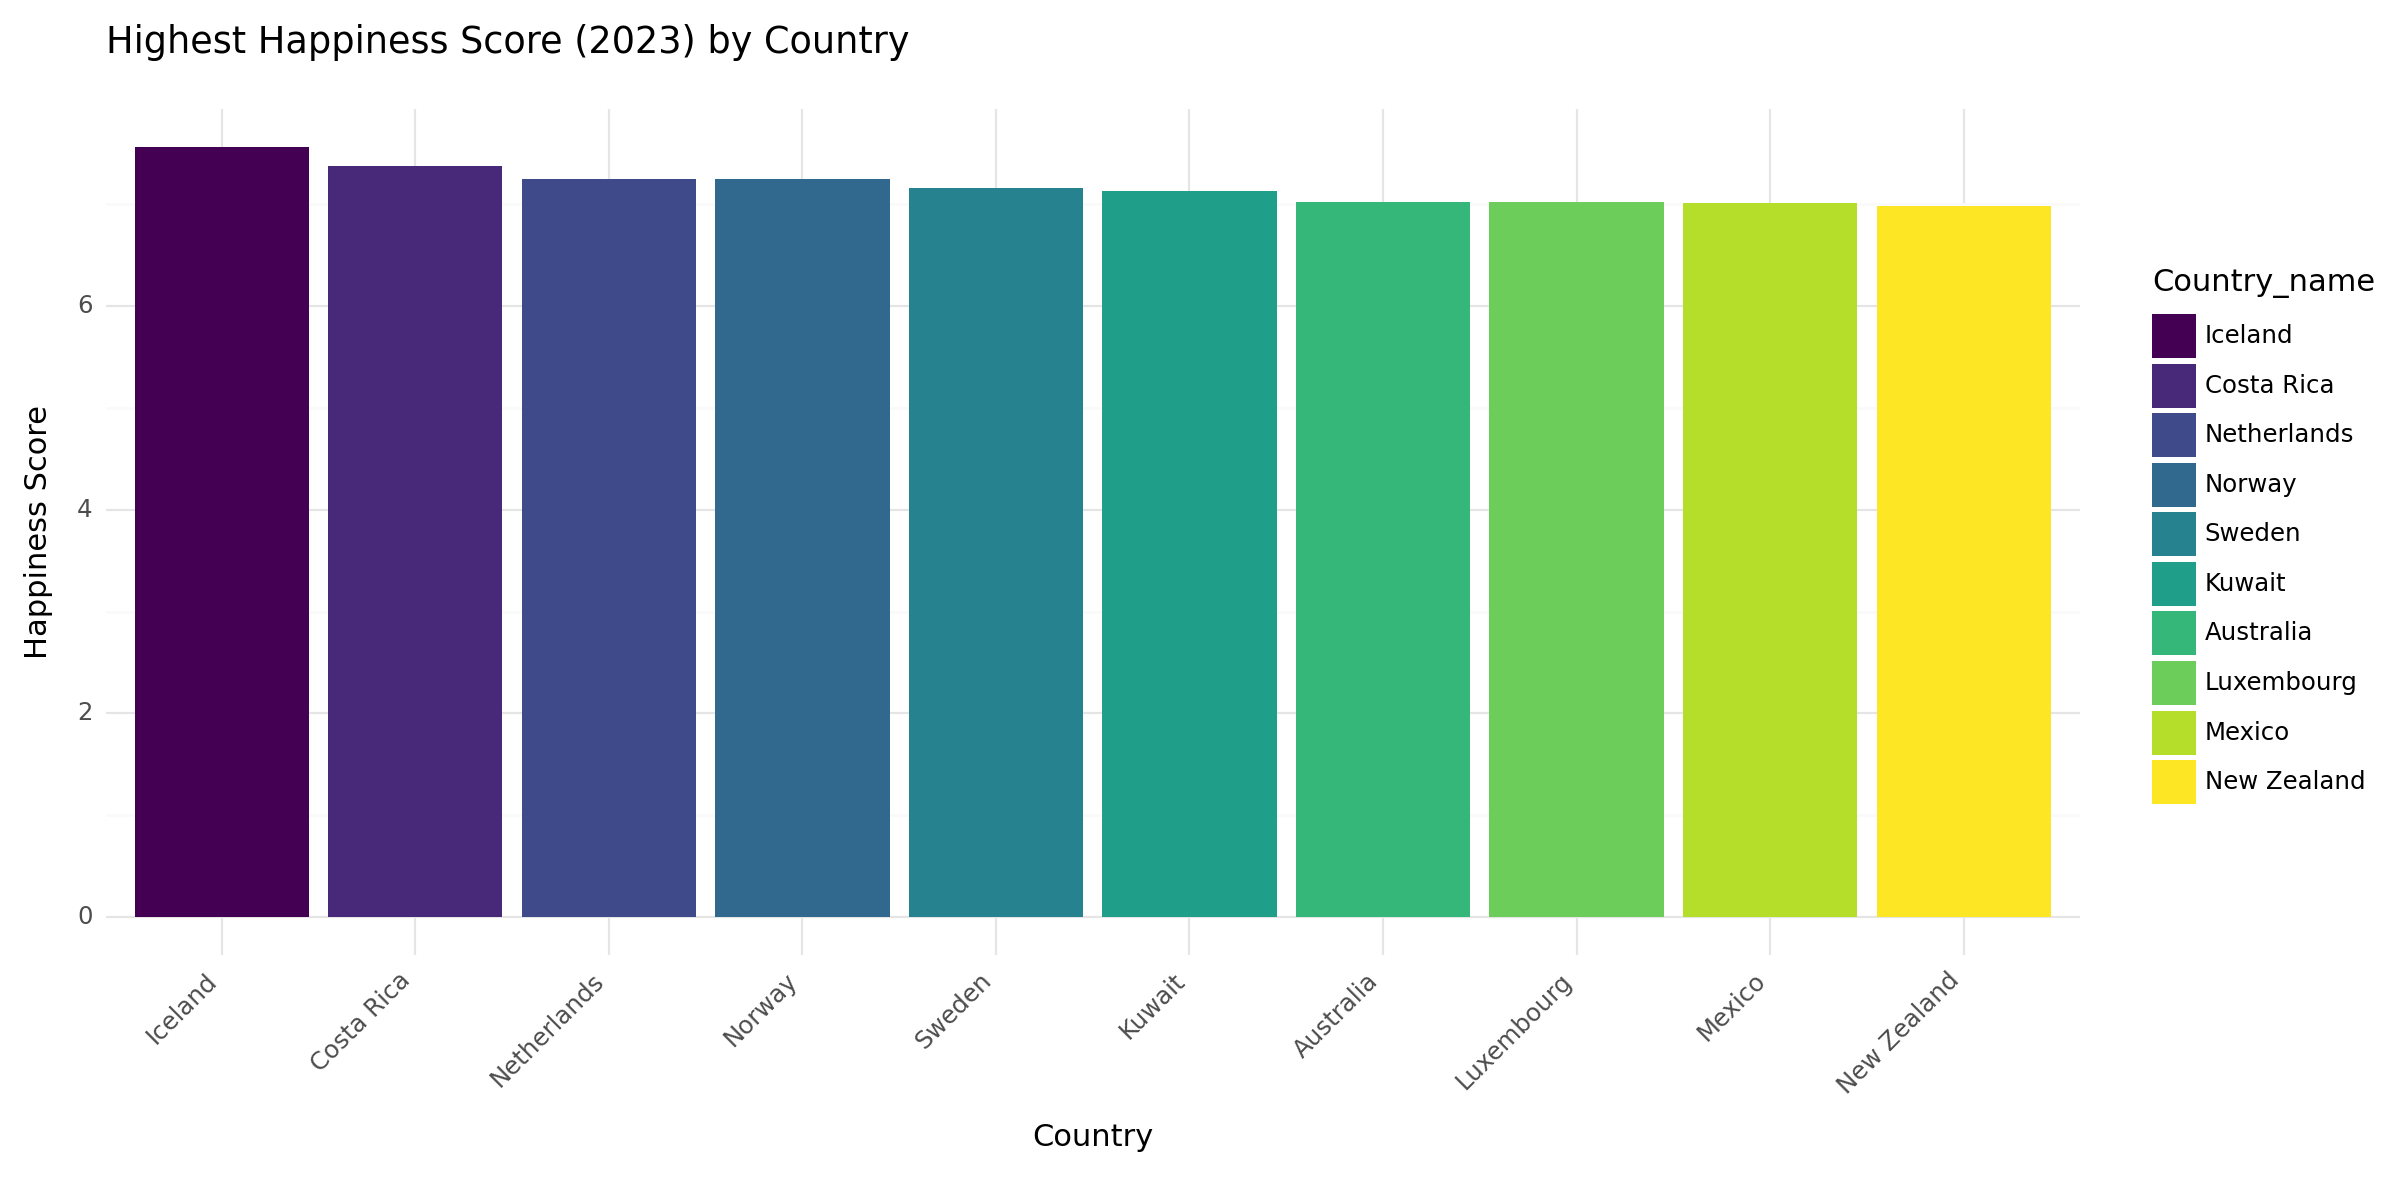


  Country_name  Life_Ladder
0      Iceland         7.56
1   Costa Rica         7.38
2  Netherlands         7.25
3       Norway         7.25
4       Sweden         7.16
5       Kuwait         7.13
6    Australia         7.02
7   Luxembourg         7.02
8       Mexico         7.01
9  New Zealand         6.98


In [65]:
# Filtering the dataset for the year 2023
year_2023 = new_dataset.loc[new_dataset['year'] == 2023]

# Grouping the data by country and calculate the sum of the Life Ladder scores
# Sorting the values in descending order and select the top 10 countries
highest_2023 = (
    year_2023.groupby('Country_name')['Life_Ladder']
    .sum()
    .sort_values(ascending=False)
    .round(2)
    .head(10)
    .reset_index()
)

# Reordering the Country_name factor based on the Life_Ladder values
highest_2023['Country_name'] = pd.Categorical(highest_2023['Country_name'],
                                              categories=highest_2023['Country_name'],
                                              ordered=True)

# Creating a bar chart using plotnine
plot = (
    ggplot(highest_2023, aes(x='Country_name', y='Life_Ladder', fill='Country_name')) +
    geom_bar(stat='identity') +
    labs(title='Highest Happiness Score (2023) by Country',
         x='Country',
         y='Happiness Score') +
    theme_minimal() +
    theme(axis_text_x=element_text(rotation=45, hjust=1),
          figure_size=(12, 6))
)

print(plot)

# Displaying the highest_2023 DataFrame
print(highest_2023)

**Bar chart of bottom 10 countries by Happiness Score in 2023**

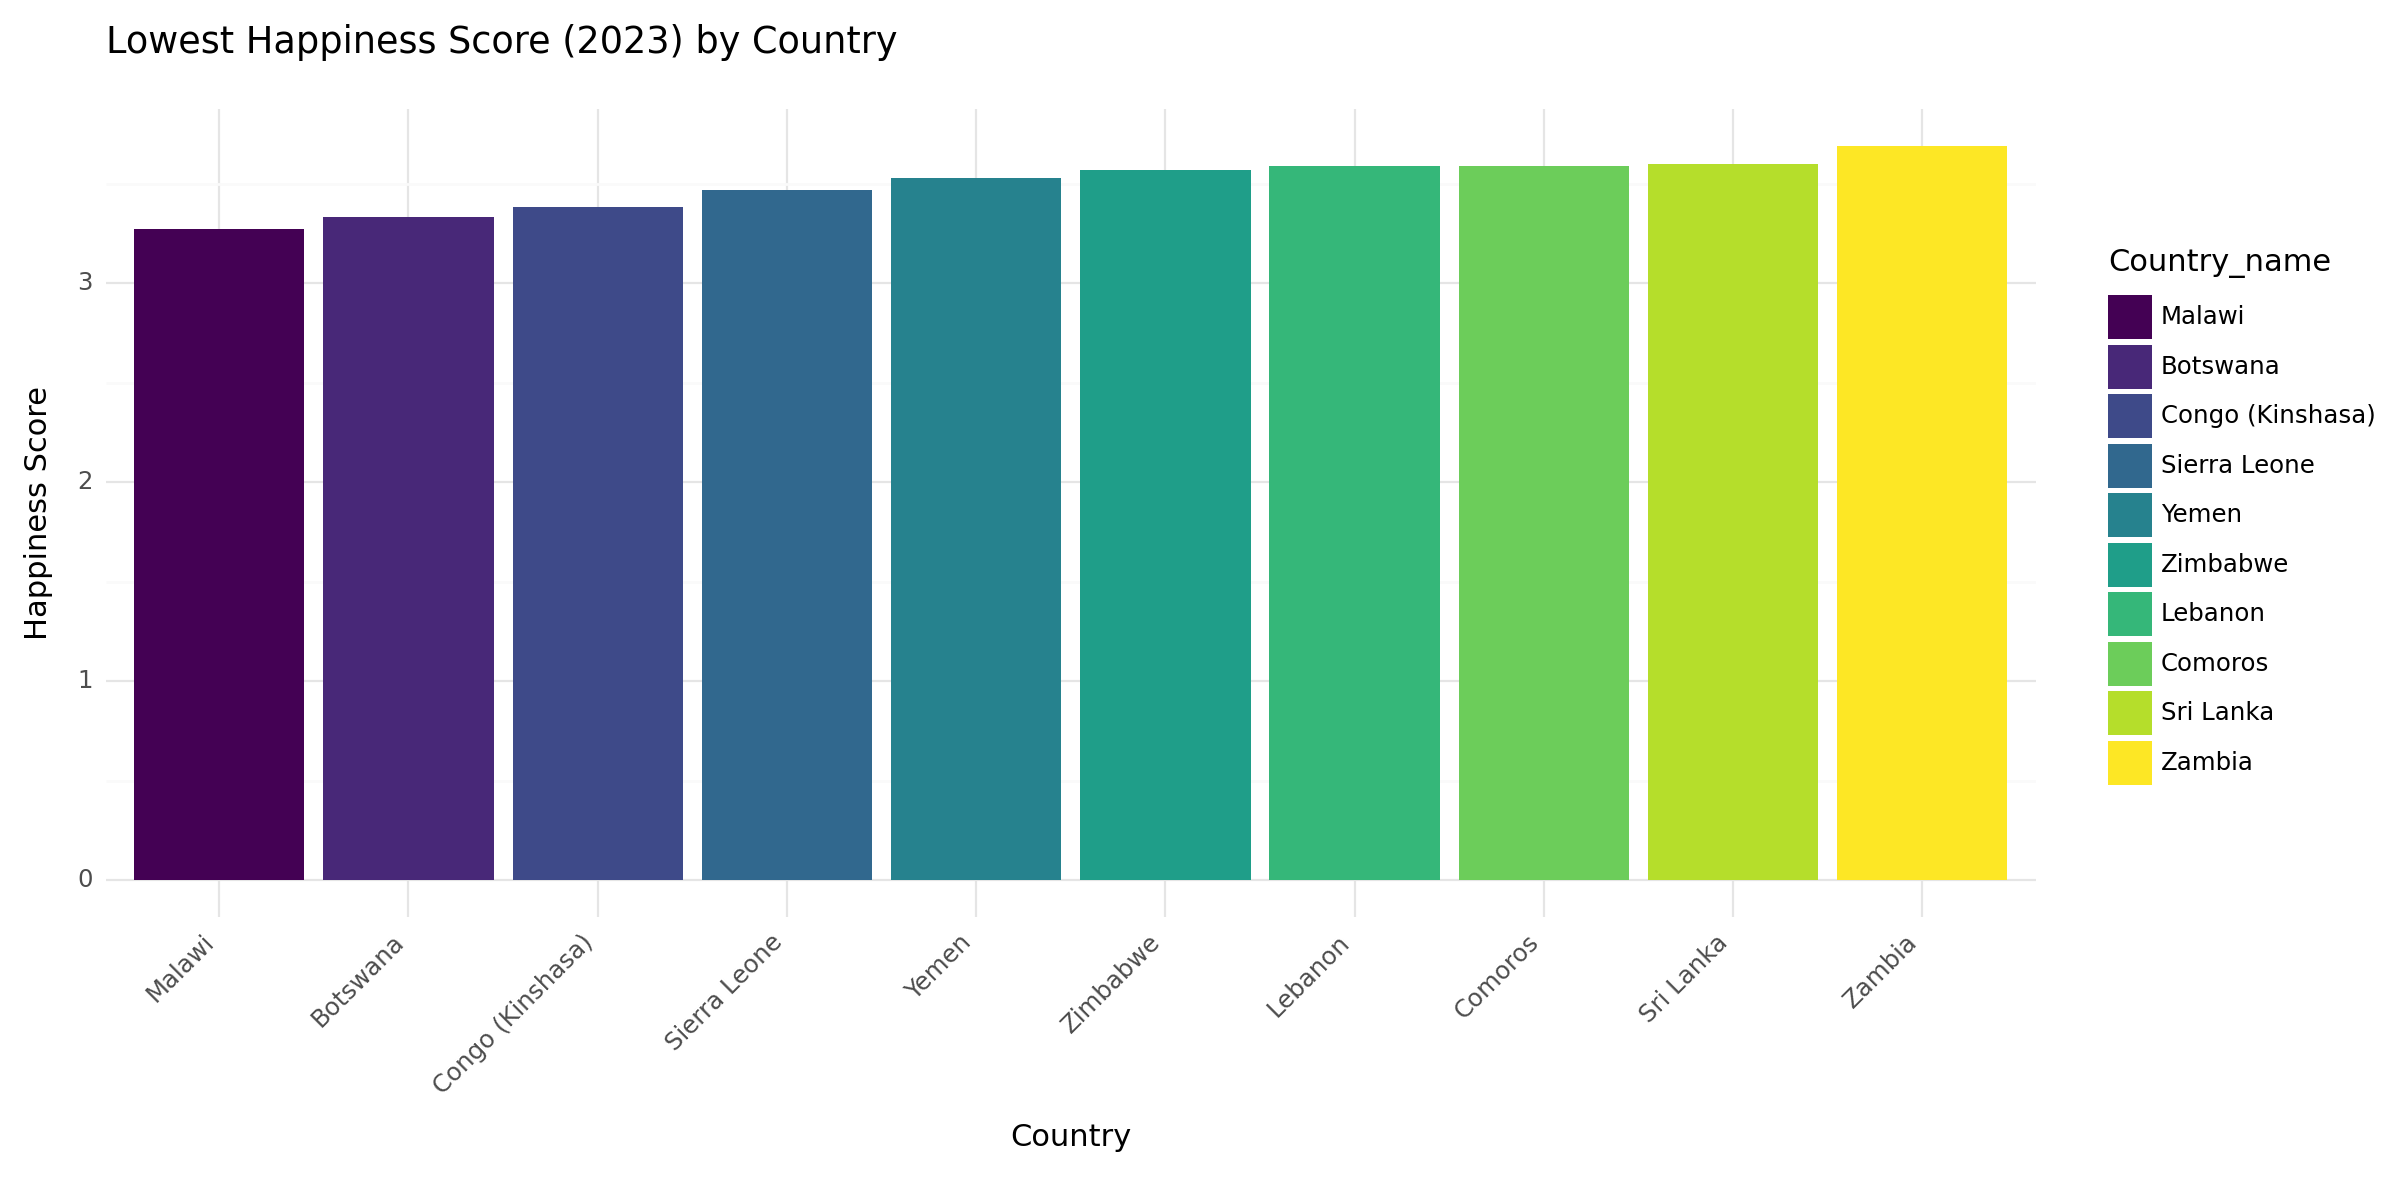


       Country_name  Life_Ladder
0            Malawi         3.27
1          Botswana         3.33
2  Congo (Kinshasa)         3.38
3      Sierra Leone         3.47
4             Yemen         3.53
5          Zimbabwe         3.57
6           Lebanon         3.59
7           Comoros         3.59
8         Sri Lanka         3.60
9            Zambia         3.69


In [66]:
# Grouping the data by country and calculate the sum of the Life Ladder scores
# Sorting the values in ascending order (lowest first) and select the top 10 countries
lowest_2023 = (
    year_2023.groupby('Country_name')['Life_Ladder']
    .sum()
    .sort_values(ascending=True)
    .round(2)
    .head(10)
    .reset_index()
)

# Reordering the Country_name factor based on the Life_Ladder values
lowest_2023['Country_name'] = pd.Categorical(lowest_2023['Country_name'],
                                             categories=lowest_2023['Country_name'],
                                             ordered=True)

# Creating a bar chart using plotnine
plot = (
    ggplot(lowest_2023, aes(x='Country_name', y='Life_Ladder', fill='Country_name')) +
    geom_bar(stat='identity') +
    labs(title='Lowest Happiness Score (2023) by Country',
         x='Country',
         y='Happiness Score') +
    theme_minimal() +
    theme(axis_text_x=element_text(rotation=45, hjust=1),
          figure_size=(12, 6))
)

print(plot)

# Displaying the lowest_2023 DataFrame
print(lowest_2023)

**Bar plot of factors correlated with Freedom to Make Life Choices**

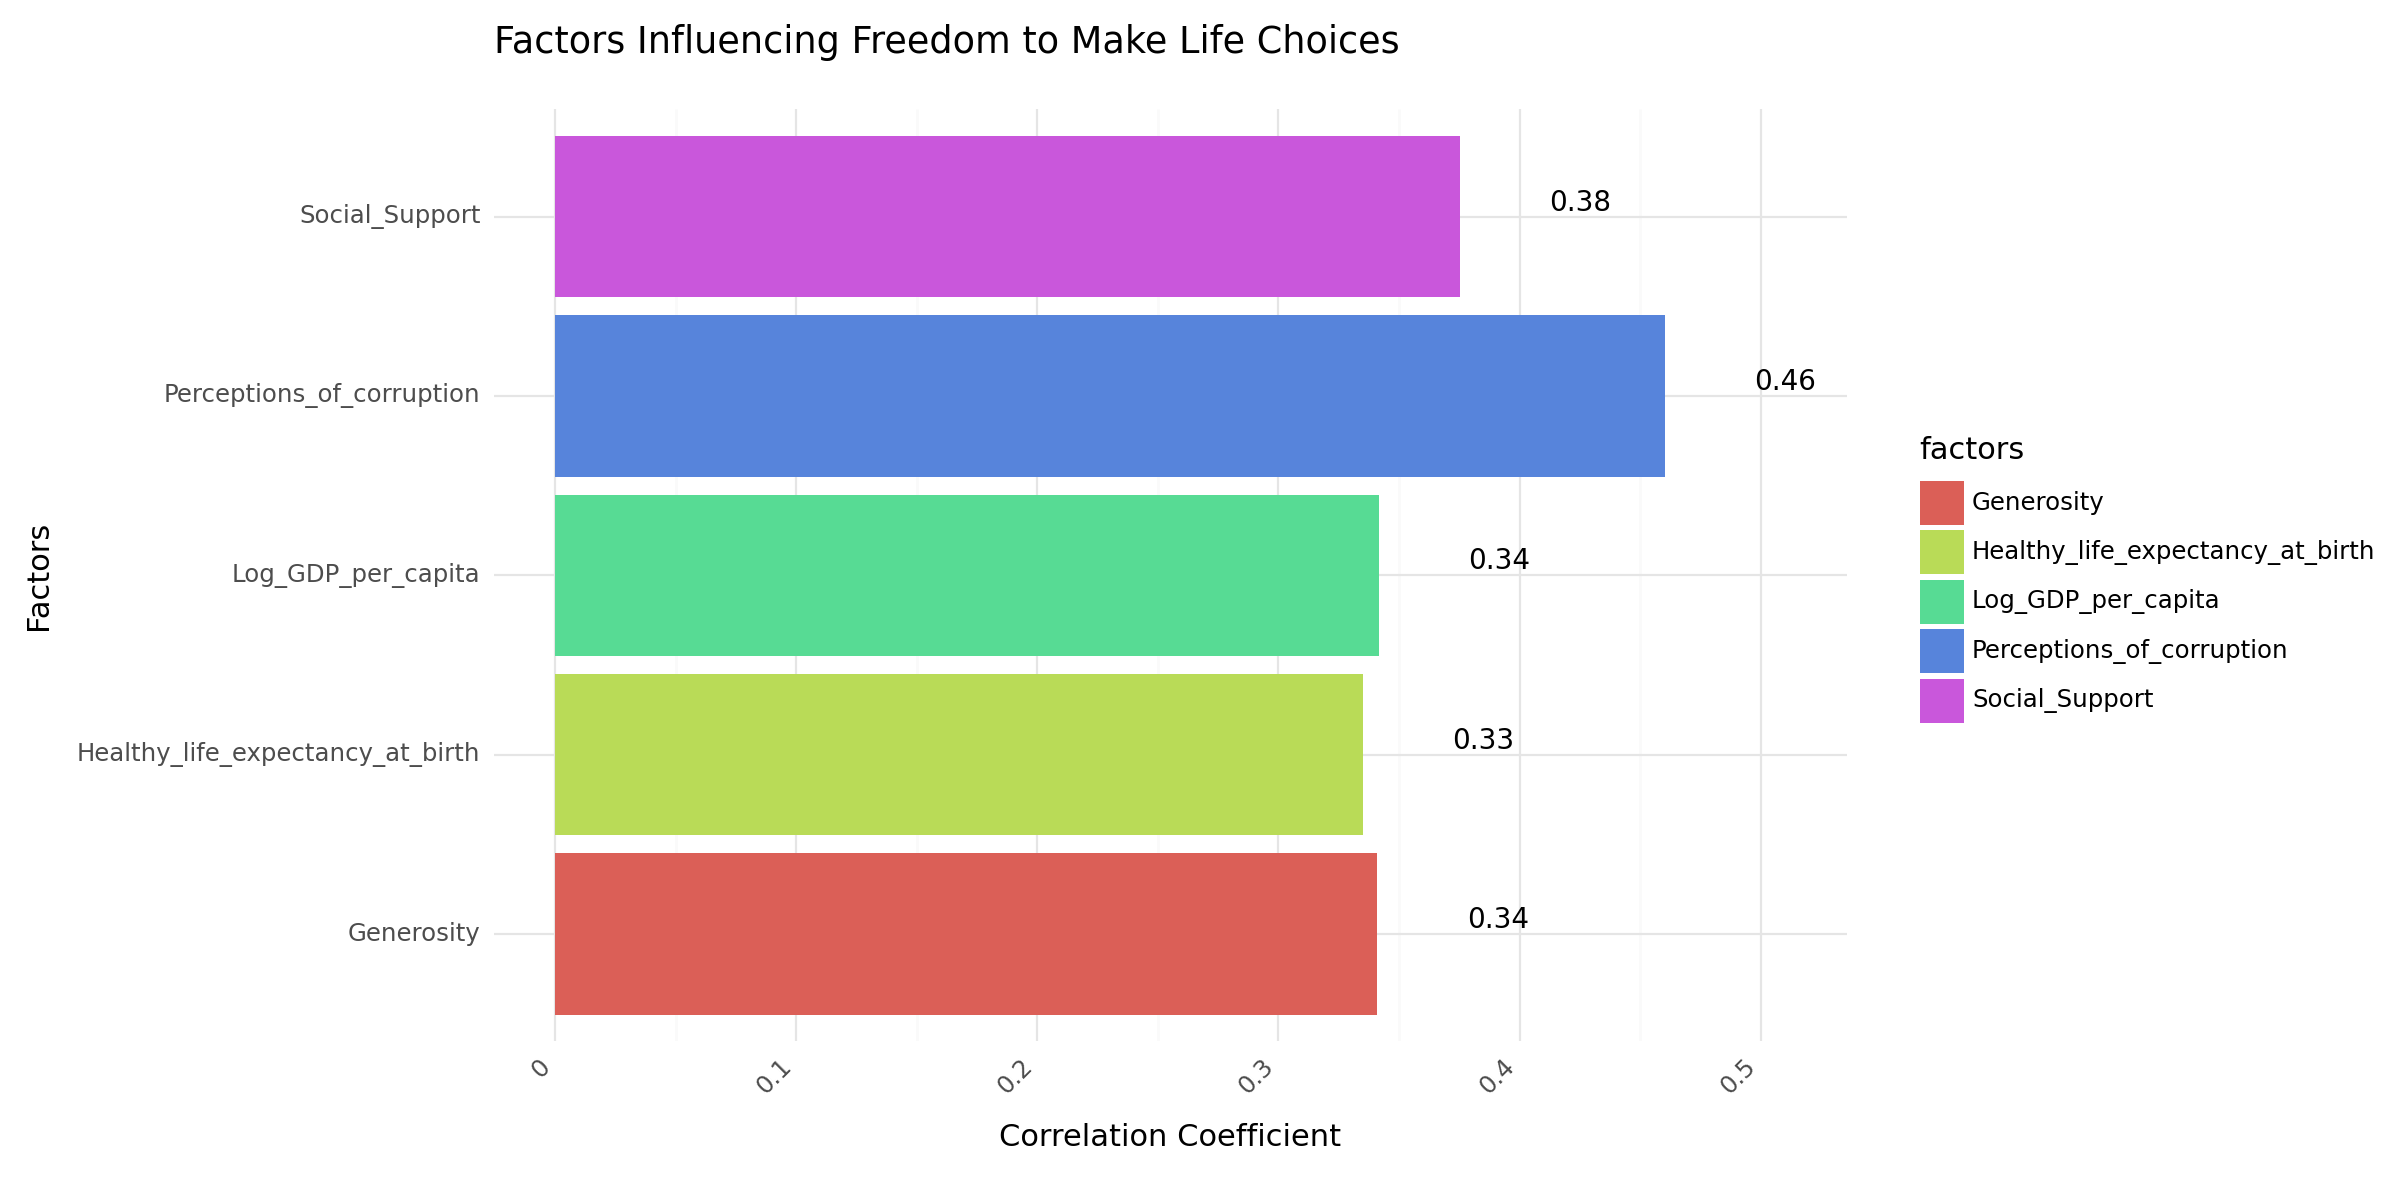



Correlations with Freedom to Make Life Choices:
Perceptions_of_corruption           0.460339
Social_Support                      0.375182
Log_GDP_per_capita                  0.341576
Generosity                          0.340980
Healthy_life_expectancy_at_birth    0.334865
Name: Freedom_to_make_life_choices, dtype: float64


In [67]:
# List of factors to correlate with Happiness score
factors = ['Log_GDP_per_capita', 'Social_Support', 'Healthy_life_expectancy_at_birth',
           'Generosity', 'Perceptions_of_corruption']

# Calculating correlations
correlations = new_dataset[factors + ['Freedom_to_make_life_choices']].corr()['Freedom_to_make_life_choices'].drop('Freedom_to_make_life_choices')

# Sorting correlations
correlations_sorted = correlations.abs().sort_values(ascending=False)

plot = (
    ggplot(pd.DataFrame({'factors': correlations_sorted.index, 'correlations': correlations_sorted.values}),
           aes(x='factors', y='correlations', fill='factors')) +
    geom_bar(stat='identity') +
    geom_text(aes(label='correlations'), va='bottom', size=10, format_string='{:.2f}', nudge_y=0.05) +
    labs(title='Factors Influencing Freedom to Make Life Choices',
         x='Factors',
         y='Correlation Coefficient') +
    theme_minimal() +
    theme(axis_text_x=element_text(rotation=45, hjust=1),
          figure_size=(12, 6)) + coord_flip()
)

print(plot)

# Printing the correlations
print("\nCorrelations with Freedom to Make Life Choices:")
print(correlations_sorted)

**Density plots for Positive and Negative Affect**

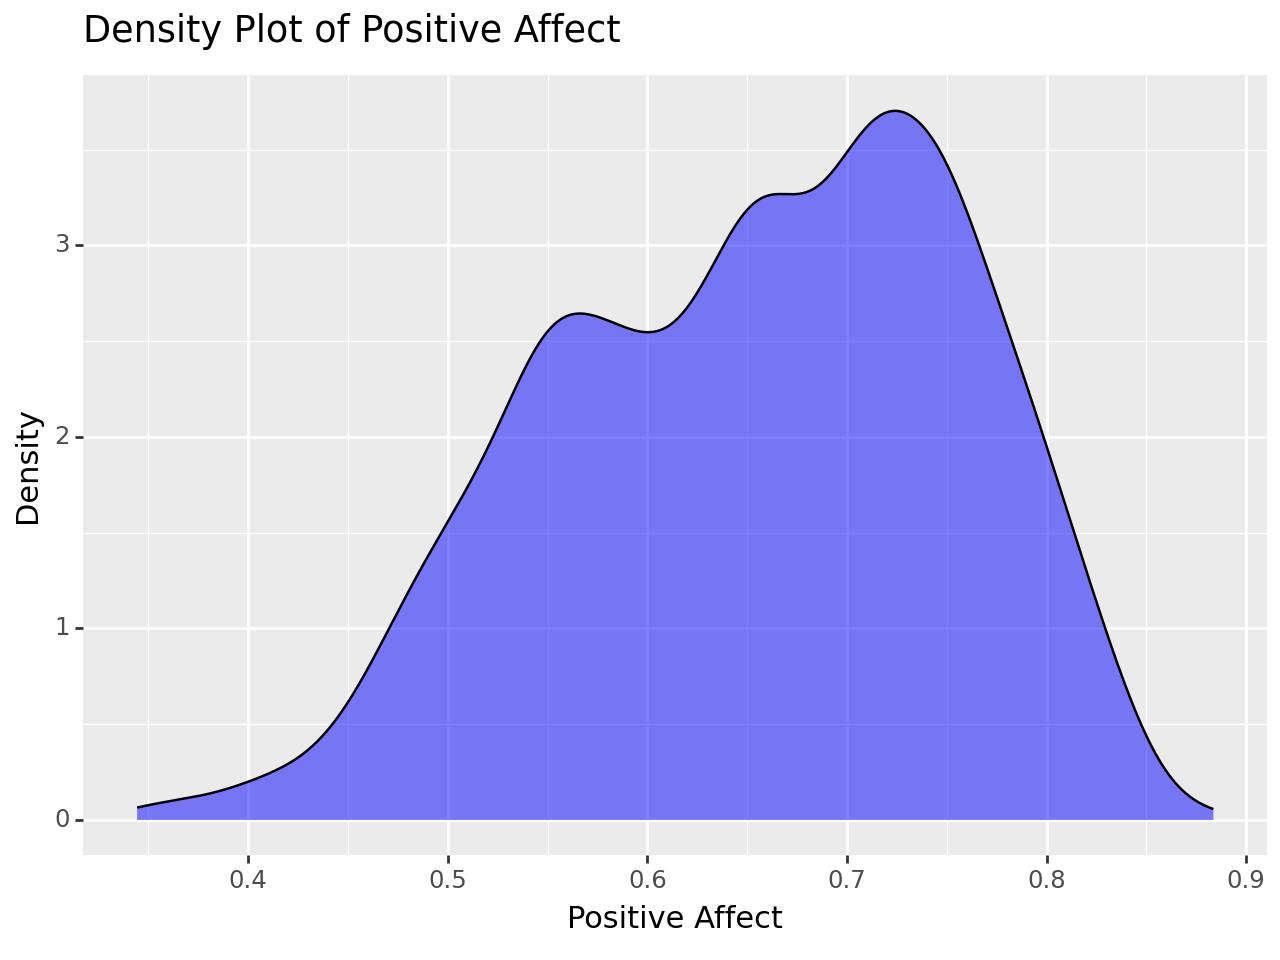

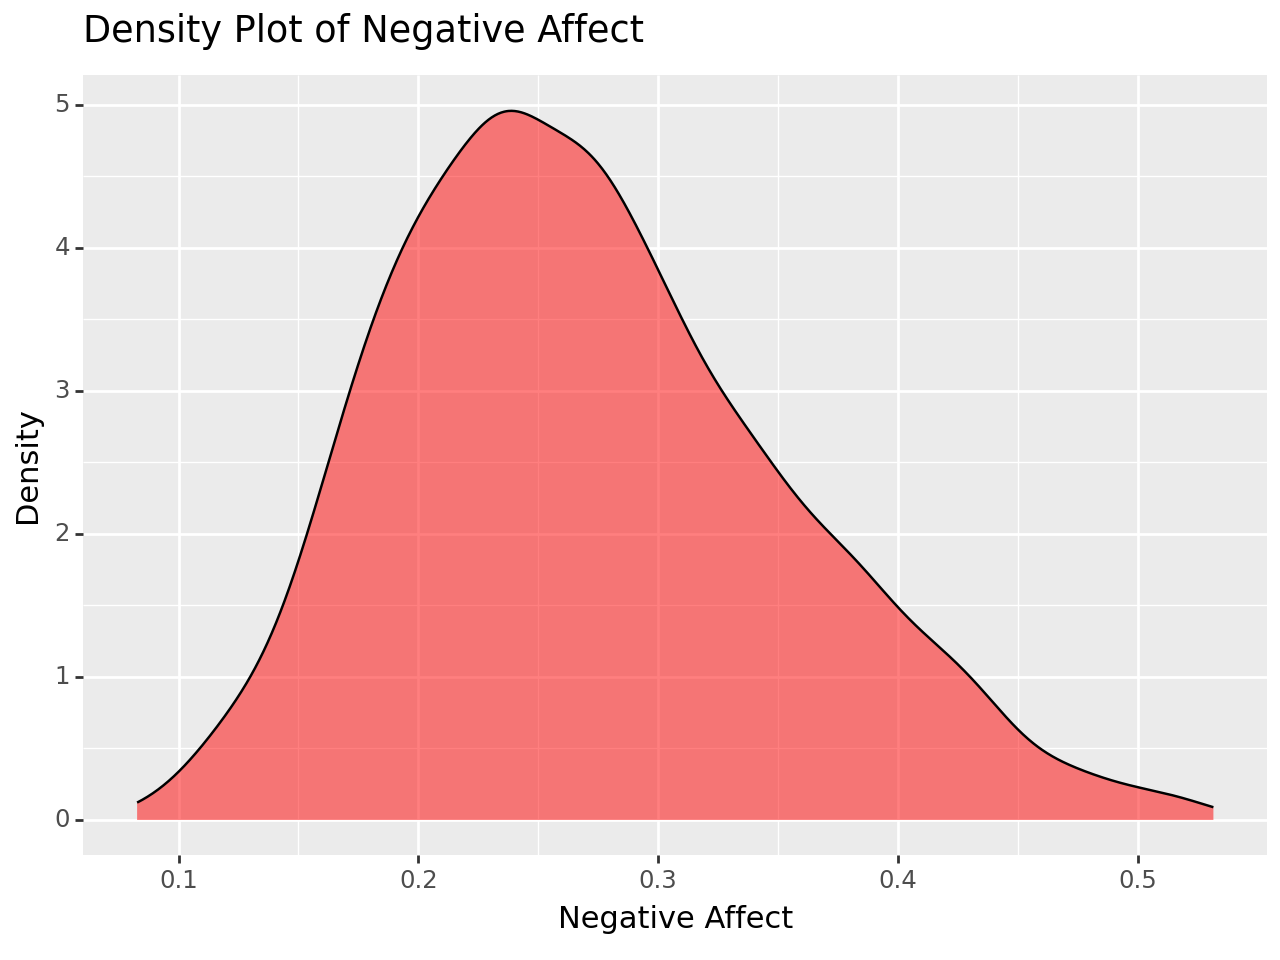

In [68]:
# Positive affect density plot
density_positive = (
    ggplot(new_dataset, aes(x='Positive_affect')) +
    geom_density(fill='blue', alpha=0.5) +
    labs(title='Density Plot of Positive Affect', x='Positive Affect', y='Density')
)

# Negative affect density plot
density_negative = (
    ggplot(new_dataset, aes(x='Negative_affect')) +
    geom_density(fill='red', alpha=0.5) +
    labs(title='Density Plot of Negative Affect', x='Negative Affect', y='Density')
)

print(density_positive)
print(density_negative)

**Boxplot of Happiness Scores by Year and Continent**

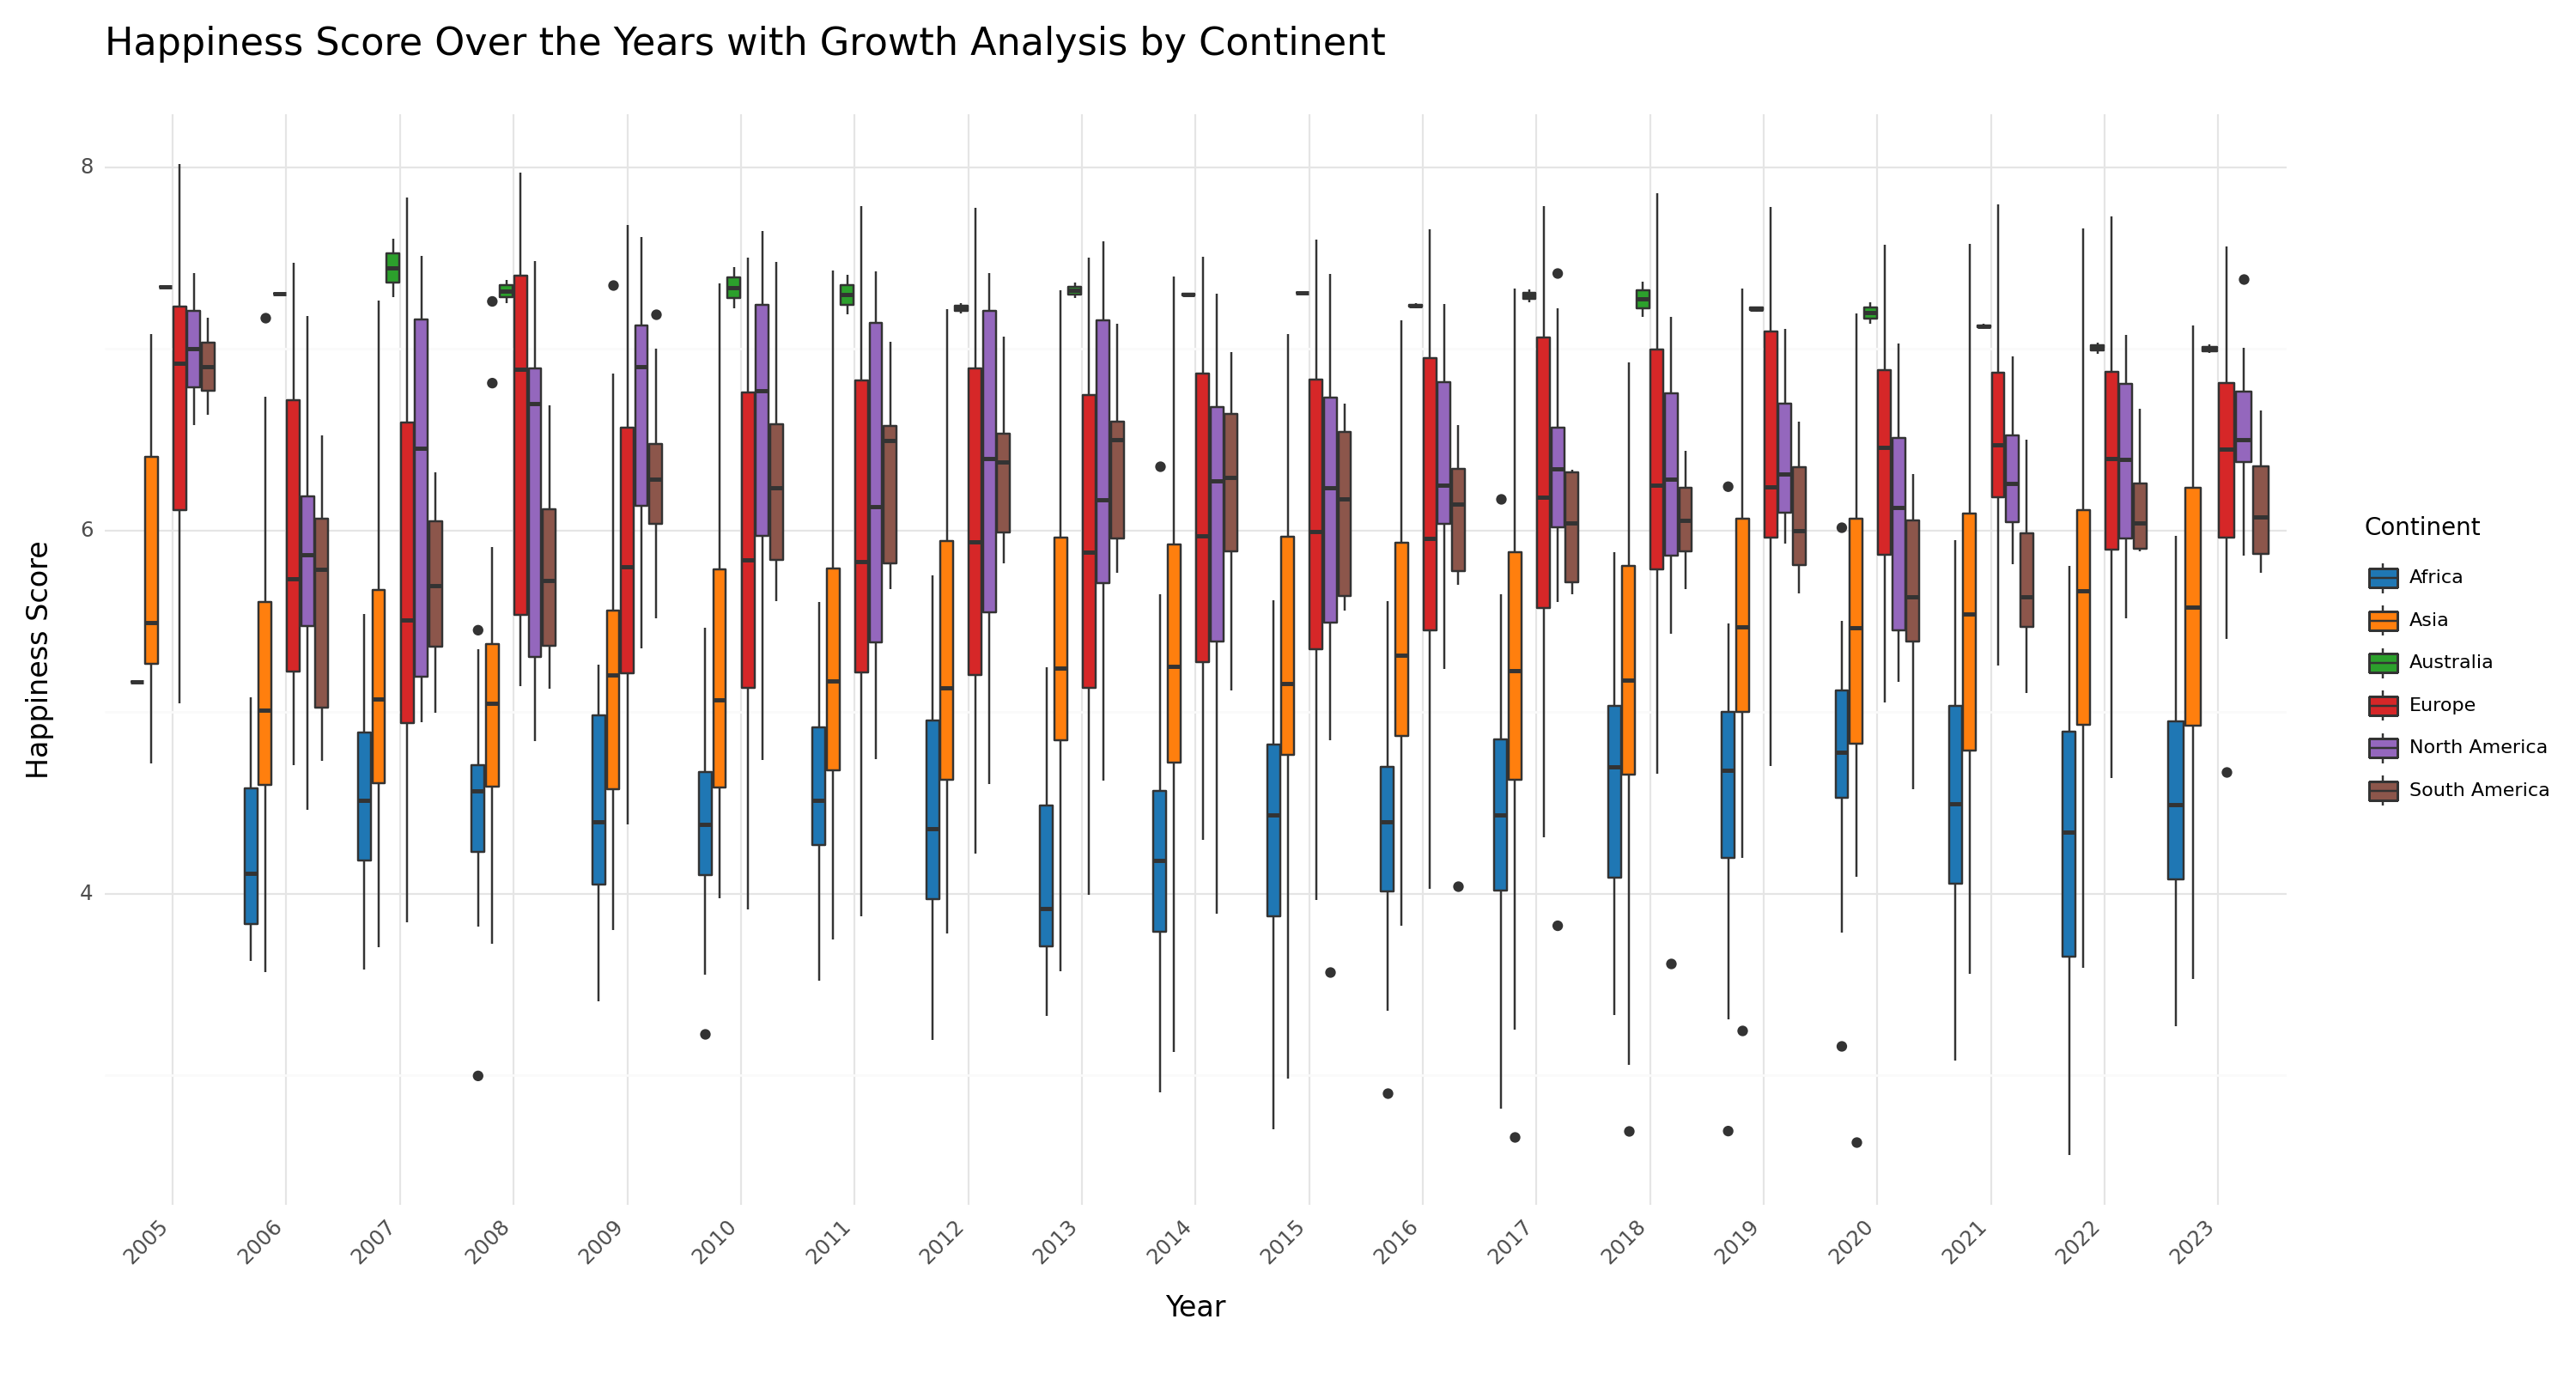

In [69]:
# Define a custom color palette
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Create the plot
plot = (
    ggplot(new_dataset, aes(x='factor(year)', y='Life_Ladder', fill='continent')) +
    geom_boxplot() +
    labs(title='Happiness Score Over the Years with Growth Analysis by Continent',
         x='Year',
         y='Happiness Score',
         fill='Continent') +
    theme_minimal() +
    theme(
        figure_size=(15, 8),
        axis_text_x=element_text(angle=45, hjust=1),
        plot_title=element_text(size=16),
        axis_title=element_text(size=12),
        legend_title=element_text(size=10),
        legend_text=element_text(size=8)
    ) +
    scale_fill_manual(values=custom_palette)
)

# Display the plot
print(plot)